In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [455]:
pd.set_option('display.max_columns',251)
pd.set_option('display.max_rows',150)

In [743]:
df = pd.read_csv('HackerRank2018.csv')

In [744]:
df.drop({'q15Level2','q22LangProfGo','q22LangProfPascal','q22LangProfClojure','q22LangProfHaskell','q22LangProfLua','q22LangProfOther','q0022_other','q23FrameAngularJS','q23FrameReact','q23FrameVueDotJS','q23FrameEmber','q23FrameBackboneDotJS','q23FrameSpring','q23FrameJSF','q23FrameStruts','q23FrameNodeDotJS','q23FrameExpressJS','q23FrameMeteor','q23FrameDjango','q23FramePyramid','q23FrameRubyonRails','q23FramePadrino','q23FrameASP','q23FrameNetCore','q23FrameCocoa','q23FrameReactNative','q23FrameRubyMotion','q23FrameOther','q0023_other','q24VimorEmacs','q0024_other','q25LangGo','q25LangPascal','q25LangClojure','q25LangHaskell','q25LangLua','q25LangRust','q25LangTypescript','q25LangKotlin','q25LangJulia','q25LangErlang','q25LangOcaml','q25LangOther','q26FrameLearnAngularJS','q26FrameLearnReact','q26FrameLearnVueDotjs','q26FrameLearnEmber','q26FrameLearnBackboneDotjs','q26FrameLearnSpring','q26FrameLearnJSF','q26FrameLearnStruts','q26FrameLearnDjango','q26FrameLearnPyramid','q26FrameLearnRubyonRails','q26FrameLearnPadrino','q26FrameLearnASP','q26FrameLearnNetCore','q26FrameLearnNodeDotjs','q26FrameLearnExpressJS','q26FrameLearnMetero','q26FrameLearnCocoa','q26FrameLearnReactNative','q26FrameLearnRubyMotion','q26FrameLearnPadrino2','q26FrameLearnDjango2','q26FrameLearnPyramid2','q0026_other','q28LoveC','q28LoveCPlusPlus','q28LoveJava','q28LovePython','q28LoveRuby','q28LoveJavascript','q28LoveCSharp','q28LoveGo','q28LoveScala','q28LovePerl','q28LoveSwift','q28LovePascal','q28LoveClojure','q28LovePHP','q28LoveHaskell','q28LoveLua','q28LoveR','q28LoveRust','q28LoveKotlin','q28LoveTypescript','q28LoveErlang','q28LoveJulia','q28LoveOCaml','q28LoveOther','q29FrameLoveAngularJS','q29FrameLoveReact','q29FrameLoveVuedotjs','q29FrameLoveEmber','q29FrameLoveBackboneDotjs','q29FrameLoveSpring','q29FrameLoveJSF','q29FrameLoveStruts','q29FrameLoveDjango','q29FrameLovePyramid','q29FrameLoveRubyonRails','q29FrameLovePadrino','q29FrameLoveASP','q29FrameLoveNetCore','q29FrameLoveNodeDotjs','q29FrameLoveExpressJS','q29FrameLoveMeteor','q29FrameLoveCocoa','q29FrameLoveReactNative','q29FrameLoveRubyMotion','q0029_other','q31Level3','q0032_other','q36Level4'},axis=1,inplace=True)

In [663]:
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,NaN,student,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional growth and learning,NaN,NaN,Whiteboard Interview,NaN,NaN,NaN,NaN,Resume,NaN,NaN,NaN,Acceptable,No,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,NaN,statisics - using R,Stack Overflow,YouTube,NaN,NaN,NaN,NaN,NaN,Other (please specify),datacamp,Yes,No,NaN,#NULL!,NaN
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",NaN,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,NaN,Test Automation Lead,NaN,Software Test Engineer,NaN,Financial Services,NaN,Preferred tech stack,Company mission,Company culture,

In [6]:
dfCan = df[['RespondentID','StartDate','EndDate','CountryNumeric2','q1AgeBeginCoding','q2Age','q3Gender','q4Education',\
'q0004_other','q5DegreeFocus','q0005_other','q6LearnCodeUni','q6LearnCodeSelfTaught','q6LearnCodeAccelTrain',\
'q6LearnCodeDontKnowHowToYet','q6LearnCodeOther','q0006_other','q7Level1','q8JobLevel','q0008_other','q8Student','q9CurrentRole'\
,'q0009_other','q10Industry','q0010_other','q12JobCritPrefTechStack','q12JobCritCompMission','q12JobCritCompCulture',\
'q12JobCritWorkLifeBal','q12JobCritCompensation','q12JobCritProximity','q12JobCritPerks','q12JobCritSmartPeopleTeam',\
'q12JobCritImpactwithProduct','q12JobCritInterestProblems','q12JobCritFundingandValuation','q12JobCritStability',\
'q12JobCritProfGrowth','q12JobCritOther','q0012_other','q13EmpMeasWhiteboard','q13EmpMeasHackerRank',\
'q13EmpMeasOtherCodingChallenge','q13EmpMeasTechPhoneInt','q13EmpMeasTakeHomeProject','q13EmpMeasResume','q13EmpMeasPastWork',\
'q13EmpMeasOther','q0013_other','q14GoodReflecAbilities','q16HiringManager','q25LangC','q25LangCPlusPlus','q25LangJava',\
'q25LangPython','q25LangRuby','q25LangJavascript','q25LangCSharp','q25Scala','q25LangPerl','q25LangSwift','q25LangPHP',\
'q25LangR','q27EmergingTechSkill','q0027_other','q30LearnCodeStackOverflow','q30LearnCodeYoutube','q30LearnCodeMOOC',\
 'q30LearnCodeCompCodingSites','q30LearnCodeOnlineTutorial','q30LearnCodeBooks','q30LearnCodeAcademicPaper','q32RecommendHackerRank','q33HackerRankChallforJob','q34PositiveExp','q34IdealLengHackerRankTest']]

In [7]:
dfHM = df[['RespondentID','q17HirChaInterviews','q17HirChaHardAssessSkills','q17HirChaNotEnoughTalent',\
           'q17HirChaNoDiversCandidates','q17HirChaCompfromCompanies','q17HirChaJobDescript','q18NumDevelopHireWithinNextYear',\
           'q19TalToolResumeScreen','q19TalToolReferral','q19TalToolHackerRank','q19TalToolOtherProbSolv','q19TalToolPersTest',\
           'q19TalToolRemoteorLiveIntTool','q19TalToolOutsourceHumIntPanel','q20CandYearExp','q20CandCompScienceDegree',\
           'q20CandCodingBootcamp','q20CandSkillCert','q20CandHackerRankActivity','q20CandOtherCodingCommAct',\
           'q20CandGithubPersProj','q20CandOpenSourceContrib','q20CandHackathonPart','q20CandPrevWorkExp','q20CandPrestigeDegree'\
           ,'q20CandLinkInSkills','q20CandGithubPersProj2','q21CoreCompProbSolv','q21CoreCompProgLang','q21CoreCompFrameworkProf'\
           ,'q21CoreCompDebugging','q21CoreCompCodebaseNav','q21CoreCompPerfOpt','q21CoreCompCodeReview',\
           'q21CoreCompDatabaseDesign','q21CoreCompSysDesign','q21CoreCompTesting','q22LangProfAgnostic','q22LangProfC',\
           'q22LangProfCPlusPlus','q22LangProfJava','q22LangProfPython','q22LangProfRuby','q22LangProfJavascript',\
           'q22LangProfCSharp','q22LangProfScala','q22LangProfPerl','q22LangProfSwift','q22LangProfPHP','q22LangProfR']]

In [8]:
dfCan.replace(to_replace='#NULL!',value=np.nan,inplace=True)
dfHM.replace(to_replace='#NULL!',value=np.nan,inplace=True)

In [9]:
len(dfCan)
len(dfHM)

25090

25090

In [10]:
dfCan.groupby(['q3Gender','q1AgeBeginCoding'])['RespondentID'].count()

q3Gender    q1AgeBeginCoding  
Female      11 - 15 years old       569
            16 - 20 years old      2657
            21 - 25 years old       609
            26 - 30 years old       130
            31 - 35 years old        48
            36 - 40 years old        19
            41 - 50 years old        12
            5 - 10 years old         71
            50+ years or older        3
Male        11 - 15 years old      4651
            16 - 20 years old     11543
            21 - 25 years old      2998
            26 - 30 years old       506
            31 - 35 years old       144
            36 - 40 years old        47
            41 - 50 years old        22
            5 - 10 years old        848
            50+ years or older        3
Non-Binary  11 - 15 years old        37
            16 - 20 years old        57
            21 - 25 years old        11
            26 - 30 years old         5
            31 - 35 years old         1
            36 - 40 years old         1
         

In [11]:
dfCan.q3Gender.unique()

array(['Female', 'Male', 'Non-Binary', nan], dtype=object)

In [12]:
dfCan.loc[dfCan['q4Education'].isnull(),'q4Education'] = dfCan['q0004_other']
dfCan.loc[dfCan['q5DegreeFocus'].isnull(),'q5DegreeFocus'] = dfCan['q0005_other']
dfCan.loc[dfCan['q8JobLevel'].isnull(),'q8JobLevel'] = dfCan['q0008_other']
dfCan.loc[dfCan['q9CurrentRole'].isnull(),'q9CurrentRole'] = dfCan['q0009_other']
dfCan.loc[dfCan['q10Industry'].isnull(),'q10Industry'] = dfCan['q0010_other']
dfCan.loc[dfCan['q27EmergingTechSkill'].isnull(),'q27EmergingTechSkill'] = dfCan['q0027_other']

In [13]:
dfCan.drop({'q0004_other','q0005_other','q0008_other','q0009_other','q0010_other','q0027_other'},axis=1,inplace=True)

In [14]:
len(dfCan.columns)

70

In [15]:
for r in dfCan.columns:
    if r.startswith('q25'):
        dfCan[r] = dfCan[r].apply(lambda x: 0 if x=='Will Learn' else (1 if x=='Know' else np.nan))

for r in dfCan.columns:
    if r.startswith('q30'):
        dfCan[r].fillna(0,inplace=True)
        dfCan[r] = dfCan[r].apply(lambda x: 0 if x==0 else 1)

dfCan['q32RecommendHackerRank']=dfCan['q32RecommendHackerRank'].apply(lambda x: 0 if x=='No' else (1 if x=='Yes' else np.nan))

dfCan['q33HackerRankChallforJob']=dfCan['q33HackerRankChallforJob'].apply(lambda x: 0 if x=='No' else (1 if x=='Yes' else np.nan))

In [16]:
for r in dfHM.columns:
    if r.startswith('q') and r!='q18NumDevelopHireWithinNextYear':
        dfHM[r].fillna(0,inplace=True)
        dfHM[r] = dfHM[r].apply(lambda x: 0 if x==0 else 1)

In [51]:
topCoun = dfCan.groupby('CountryNumeric2')['RespondentID'].count().nlargest(10)

In [22]:
dfCan.groupby('q1AgeBeginCoding')['RespondentID'].count().sort_values(ascending=False)

q1AgeBeginCoding
16 - 20 years old     14293
11 - 15 years old      5264
21 - 25 years old      3626
5 - 10 years old        933
26 - 30 years old       642
31 - 35 years old       193
36 - 40 years old        67
41 - 50 years old        34
50+ years or older        8
Name: RespondentID, dtype: int64

In [23]:
dfCan.groupby('q3Gender')['RespondentID'].count()

q3Gender
Female         4122
Male          20774
Non-Binary      125
Name: RespondentID, dtype: int64

In [27]:
dfCan.groupby('q4Education')['RespondentID'].count().nlargest(10)

q4Education
College graduate                          12010
Post graduate degree (Masters, PhD)        6030
Some college                               2499
Some post graduate work (Masters, PhD)     2493
High school graduate                       1289
Some high school                            316
Vocational training (like bootcamp)         148
Btech                                         6
Undergraduate                                 6
Under graduate                                4
Name: RespondentID, dtype: int64

In [74]:
dfCan.groupby('q5DegreeFocus')['RespondentID'].count().nlargest(15)

q5DegreeFocus
Computer Science                                       17972
Other STEM (science, technology, engineering, math)     5797
Economics                                                 58
Business                                                  41
Linguistics                                               20
Philosophy                                                19
Political Science                                         18
Psychology                                                18
Finance                                                   17
Music                                                     15
English                                                   14
Law                                                       14
Business Administration                                   13
Design                                                    11
Graphic Design                                            11
Name: RespondentID, dtype: int64

In [531]:
dfCan.groupby('q8JobLevel')['RespondentID'].count().nlargest(15)
top5jobLevels = dfCan.groupby('q8JobLevel')['RespondentID'].count().nlargest(5)

q8JobLevel
Student                         10355
Senior developer                 5763
Level 1 developer (junior)       4535
New grad                          912
Principal engineer                677
Architect                         518
Freelancer                        486
Engineering manager               428
Founder / CEO / CTO               323
Director / VP of Engineering      140
Middle developer                   18
Software Engineer                  18
Developer                          16
Mid level developer                16
Intern                             13
Name: RespondentID, dtype: int64

In [33]:
dfCan.groupby('q9CurrentRole')['RespondentID'].count().nlargest(15)

q9CurrentRole
Student                            8006
Software Engineer                  4482
Full-stack Developer               3498
Back-end Developer                 1922
Web Developer                      1032
Front-end Developer                1006
Mobile Developer                    812
Software Architect                  643
Data Scientist                      485
Software Test Engineer              454
Unemployed                          383
Data Analyst                        349
Development Operations Engineer     251
Data Engineer                       216
Software Specialist                 148
Name: RespondentID, dtype: int64

In [36]:
topInd = dfCan.groupby('q10Industry')['RespondentID'].count().nlargest(10)

In [37]:
#Finding the people with particular language skills per industry (top 10) 
dfCan[dfCan.q10Industry.isin(topInd.index)].groupby('q10Industry').agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                                 'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'})

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp
q10Industry,,,,,,,
Automotive & Transportation,414.0,371.0,411.0,314.0,60.0,372.0,209.0
Computer Hardware,490.0,424.0,371.0,321.0,35.0,221.0,122.0
Education,2635.0,2274.0,2189.0,1653.0,218.0,1478.0,561.0
Financial Services,1272.0,1118.0,1585.0,1021.0,249.0,1419.0,734.0
Government,272.0,251.0,326.0,223.0,54.0,291.0,174.0
Health Care,401.0,345.0,480.0,351.0,109.0,463.0,239.0
Media,458.0,431.0,528.0,463.0,148.0,577.0,270.0
Retail,502.0,438.0,630.0,413.0,142.0,608.0,262.0
Security,347.0,306.0,323.0,295.0,55.0,244.0,128.0


In [46]:
#Finding the people with particular language skills per industry (top 10) with gender classification 
data1 = dfCan[(dfCan.q10Industry.isin(topInd.index)) & (dfCan.q3Gender.isin(['Male','Female']))].groupby(['q10Industry','q3Gender']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                                 'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'}).reset_index()

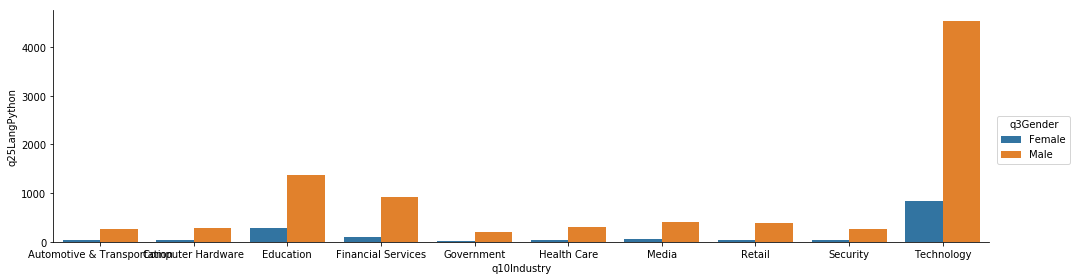

In [49]:
sns.factorplot(x='q10Industry',y='q25LangPython',hue='q3Gender',kind='bar',data=data1,aspect=3.5)

In [52]:
#Finding the people with particular language skills per country (top 10) 
dfCan[dfCan.CountryNumeric2.isin(topCoun.index)].groupby('CountryNumeric2').agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                                 'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'})

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp
CountryNumeric2,,,,,,,
Brazil,303.0,217.0,381.0,263.0,109.0,364.0,178.0
Canada,458.0,394.0,457.0,367.0,76.0,372.0,193.0
Germany,150.0,137.0,190.0,152.0,27.0,144.0,76.0
India,6970.0,5749.0,5580.0,3527.0,333.0,3791.0,1188.0
Indonesia,267.0,267.0,264.0,171.0,50.0,211.0,128.0
Poland,141.0,156.0,166.0,122.0,14.0,108.0,70.0
Russian Federation,191.0,187.0,193.0,197.0,40.0,183.0,115.0
Turkey,167.0,141.0,183.0,116.0,15.0,153.0,115.0
United Kingdom,213.0,188.0,295.0,258.0,61.0,280.0,141.0


In [55]:
dfCan[(dfCan.CountryNumeric2.isin(topCoun.index)) & (dfCan.q3Gender.isin(['Male','Female']))].groupby(['CountryNumeric2','q3Gender']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                                 'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'})

q25LangC  q25LangCPlusPlus  q25LangJava  \
CountryNumeric2    q3Gender                                            
Brazil             Female        27.0              15.0         36.0   
                   Male         275.0             202.0        344.0   
Canada             Female        86.0              75.0         77.0   
                   Male         370.0             318.0        377.0   
Germany            Female        14.0              12.0         21.0   
                   Male         134.0             124.0        167.0   
India              Female      1313.0            1054.0       1048.0   
                   Male        5630.0            4673.0       4510.0   
Indonesia          Female        52.0              47.0         44.0   
                   Male         213.0             217.0        219.0   
Poland             Female        12.0              11.0         14.0   
                   Male         129.0             145.0        152.0   
Russian Federation Female        13.0              13.0         14.0   
                   Male         177.0             173.0        177.0   
Turkey             Female        26.0              22.0         26.0   
                   Male         139.0             118.0        155.0   
United Kingdom     Female        29.0              28.0         49.0   
                   Male         184.0             160.0        245.0   
United States      Female       529.0             479.0        719.0   
                   Male        2205.0            2143.0       2819.0   

                             q25LangPython  q25LangRuby  q25LangJavascript  \
CountryNumeric2    q3Gender                                                  
Brazil             Female             22.0          5.0               32.0   
                   Male              240.0        104.0              331.0   
Canada             Female             60.0          7.0               55.0   
                   Male              304.0         68.0              315.0   
Germany            Female             20.0          7.0               13.0   
                   Male              131.0         20.0              130.0   
India              Female            546.0         50.0              653.0   
                   Male             2966.0        282.0             3120.0   
Indonesia          Female             17.0          5.0               32.0   
                   Male              152.0         44.0              177.0   
Poland             Female             12.0          1.0                9.0   
                   Male              110.0         13.0               99.0   
Russian Federation Female             13.0          1.0                6.0   
                   Male              181.0         39.0              176.0   
Turkey             Female             15.0          0.0               21.0   
                   Male               99.0         15.0              132.0   
United Kingdom     Female             33.0         11.0               40.0   
                   Male              224.0         48.0              238.0   
United States      Female            591.0        146.0              585.0   
                   Male             2525.0        636.0             2540.0   

                             q25LangCSharp  
CountryNumeric2    q3Gender                 
Brazil             Female             15.0  
                   Male              162.0  
Canada             Female             27.0  
                   Male              164.0  
Germany            Female              6.0  
                   Male               69.0  
India              Female            200.0  
                   Male              979.0  
Indonesia          Female             18.0  
                   Male              108.0  
Poland             Female              7.0  
                   Male               63.0  
Russian Federation Female              5.0  
                   Male              109.0  
Turkey 

In [665]:
nonEngDegrees = dfCan[~dfCan.q5DegreeFocus.isin(['Computer Science','Other STEM (science, technology, engineering, math)'])]\
.groupby('q5DegreeFocus')['RespondentID'].count().nlargest(15)


q5DegreeFocus
Economics                  58
Business                   41
Linguistics                20
Philosophy                 19
Political Science          18
Psychology                 18
Finance                    17
Music                      15
English                    14
Law                        14
Business Administration    13
Design                     11
Graphic Design             11
MBA                        11
Commerce                   10
Name: RespondentID, dtype: int64

In [79]:
nonEngDegData = dfCan[dfCan['q5DegreeFocus'].isin(nonEngDegrees.index)]\
.groupby(['q8JobLevel']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'}).reset_index()

In [160]:
dfCan[dfCan['q5DegreeFocus'].isin(nonEngDegrees.index)]\
.groupby(['q9CurrentRole']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
 'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False])

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp
q9CurrentRole,,,,,,,
Software Engineer,11.0,8.0,19.0,20.0,11.0,25.0,8.0
Full-stack Developer,10.0,9.0,21.0,26.0,22.0,51.0,15.0
Student,7.0,6.0,11.0,16.0,2.0,15.0,5.0
Software Architect,5.0,2.0,5.0,4.0,2.0,8.0,2.0
Data Scientist,4.0,3.0,2.0,8.0,3.0,2.0,0.0
Mobile Developer,4.0,2.0,2.0,4.0,0.0,7.0,1.0
Data Analyst,3.0,3.0,7.0,10.0,2.0,7.0,2.0
Back-end Developer,3.0,2.0,8.0,11.0,6.0,11.0,4.0
Web Developer,3.0,2.0,2.0,6.0,2.0,15.0,4.0


In [80]:
nonEngDegData.sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
 'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False])

,q8JobLevel,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp
38,Senior developer,16.0,16.0,32.0,32.0,19.0,65.0,21.0
19,Level 1 developer (junior),10.0,4.0,19.0,38.0,22.0,64.0,13.0
40,Student,7.0,7.0,13.0,19.0,3.0,18.0,5.0
15,Freelancer,4.0,4.0,3.0,6.0,2.0,7.0,0.0
33,Principal engineer,4.0,2.0,4.0,7.0,2.0,6.0,2.0
11,Engineering manager,3.0,4.0,6.0,7.0,3.0,7.0,3.0
3,Architect,3.0,1.0,4.0,4.0,1.0,7.0,2.0
14,Founder / CEO / CTO,2.0,2.0,2.0,2.0,2.0,3.0,0.0
36,Researcher,2.0,1.0,1.0,2.0,1.0,1.0,0.0
28,New grad,2.0,0.0,1.0,5.0,0.0,2.0,0.0


In [89]:
nonEngDegPeople = dfCan[(dfCan['q5DegreeFocus'].isin(nonEngDegrees.index)) & (dfCan.q16HiringManager == 'Yes')]

In [90]:
dfCan.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q5DegreeFocus,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,Computer Science,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,Students,Student,student,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional growth and learning,NaN,NaN,Whiteboard Interview,NaN,NaN,NaN,NaN,Resume,NaN,NaN,NaN,Acceptable,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,statisics - using R,1,1,0,0,0,0,0,1.0,0.0,NaN,NaN
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Test Automation Lead,NaN,Software Test Engineer,Financial Services,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,Interesting problems to solve,NaN,NaN,Professional growth and learning,NaN,NaN,NaN,NaN,NaN,Technical Phone Interview,Take Home Project,Resume,NaN,NaN,NaN,Good,Yes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning / Deep Learning,1,1,1,0,0,1,0,1.0,0.0,NaN,NaN
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,"Other STEM (science, technology, engineering, ...",School or university,NaN,Accelerated training (i.e. bootcamp),NaN,NaN,NaN,C,Student,Students,Student,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interesting problems to solve,NaN,NaN,Professional growth and learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Just a student didn't have job yet,Acceptable,No,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Robotics,0,1,0,0,0,0,1,1.0,0.0,NaN,NaN
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,Students,Student,student,NaN,NaN,Company culture,NaN,NaN,Proximity to where you live,NaN,NaN,NaN,Interesting problems to solve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),n.a.,Acceptable,No,NaN,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,Robotics,1,0,0,0,0,0,0,1.0,0.0,NaN,NaN
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,Fine Arts & Computer Science,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Senior developer,NaN,Front-end Developer,Technology,NaN,Company mission,NaN,Good work/life balance,NaN,NaN,NaN,Smart people / team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Intern work for a diff

In [91]:
nonEngManagers = nonEngDegPeople.merge(dfHM,left_on='RespondentID',right_on='RespondentID')

In [147]:
nonEngManagers.groupby(['q8JobLevel']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum','q25LangR':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum','q22LangProfR':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp','q25LangR'],ascending=[False,False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangR,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfR
q8JobLevel,,,,,,,,,,,,,,,,
Senior developer,12.0,13.0,25.0,26.0,14.0,49.0,14.0,4.0,5,5,11,14,4,43,4,4
Level 1 developer (junior),4.0,2.0,3.0,16.0,10.0,22.0,2.0,1.0,0,0,4,7,2,16,1,0
Engineering manager,3.0,4.0,6.0,5.0,3.0,7.0,2.0,1.0,2,3,3,4,1,4,1,1
Principal engineer,3.0,2.0,3.0,5.0,2.0,5.0,2.0,NaN,0,0,1,2,2,3,1,0
Architect,3.0,1.0,3.0,4.0,1.0,7.0,2.0,1.0,0,0,1,4,0,3,2,2


In [158]:
nonEngManagers.groupby(['q9CurrentRole']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum','q25LangR':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum','q22LangProfR':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp','q25LangR'],ascending=[False,False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangR,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfR
q9CurrentRole,,,,,,,,,,,,,,,,
Full-stack Developer,8.0,8.0,13.0,21.0,16.0,37.0,8.0,1.0,3,3,9,9,7,31,2,0
Software Engineer,6.0,6.0,9.0,10.0,5.0,15.0,5.0,0.0,1,2,3,4,1,8,2,0
Software Architect,5.0,2.0,3.0,3.0,2.0,7.0,2.0,0.0,1,1,2,3,0,4,1,1
Data Analyst,3.0,3.0,4.0,5.0,1.0,4.0,2.0,4.0,1,3,2,7,1,2,1,3
Mobile Developer,3.0,2.0,2.0,3.0,0.0,5.0,0.0,NaN,1,1,0,1,0,2,0,0


In [150]:
nonEngManagers.groupby(['q8JobLevel']).agg({'q25LangC':'mean','q25LangCPlusPlus':'mean','q25LangJava':'mean',\
                    'q25LangPython':'mean','q25LangRuby':'mean','q25LangJavascript':'mean','q25LangCSharp':'mean','q25LangR':'mean'\
                    ,'q22LangProfC':'mean','q22LangProfCPlusPlus':'mean','q22LangProfJava':'mean','q22LangProfPython':'mean',\
                     'q22LangProfRuby':'mean', 'q22LangProfJavascript':'mean','q22LangProfCSharp':'mean','q22LangProfR':'mean'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp','q25LangR']).head(10)

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangR,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfR
q8JobLevel,,,,,,,,,,,,,,,,
Level 1 developer (junior),0.444444,0.400000,0.428571,0.695652,0.769231,0.916667,0.500000,0.333333,0.000000,0.000000,0.166667,0.291667,0.083333,0.666667,0.041667,0.000000
New grad,0.500000,0.000000,0.000000,0.333333,0.000000,0.500000,0.000000,0.000000,0.000000,0.333333,0.333333,0.666667,0.333333,0.666667,0.000000,0.000000
Founder / CEO / CTO,0.666667,1.000000,0.666667,0.500000,0.666667,1.000000,0.000000,0.000000,0.000000,0.200000,0.200000,1.000000,0.000000,0.800000,0.000000,0.400000
Freelancer,0.666667,1.000000,0.666667,0.571429,0.333333,0.857143,0.000000,0.500000,0.000000,0.111111,0.222222,0.444444,0.222222,0.444444,0.000000,0.000000
Engineering manager,0.750000,0.666667,0.750000,0.714286,0.375000,0.700000,0.666667,0.500000,0.181818,0.272727,0.272727,0.363636,0.090909,0.363636,0.090909,0.090909
Senior developer,0.750000,0.722222,0.694444,0.619048,0.736842,0.942308,0.823529,0.400000,0.087719,0.087719,0.192982,0.245614,0.070175,0.754386,0.070175,0.070175
Architect,1.000000,0.333333,0.600000,0.666667,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.125000,0.500000,0.000000,0.375000,0.250000,0.250000
BI manager,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Principal engineer,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.200000,0.400000,0.400000,0.600000,0.200000,0.000000


In [94]:
EngPeople = dfCan[(dfCan['q5DegreeFocus'].isin(['Computer Science','Other STEM (science, technology, engineering, math)'])) &\
                 (dfCan['q16HiringManager']=='Yes')]
EngManagers = EngPeople.merge(dfHM,left_on='RespondentID',right_on='RespondentID')

In [95]:
EngManagers.groupby(['q8JobLevel']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp
q8JobLevel,,,,,,,,,,,,,,
Senior developer,2151.0,1909.0,2472.0,1646.0,573.0,2440.0,1210.0,532,634,1553,950,233,1604,618
Level 1 developer (junior),929.0,836.0,1000.0,742.0,204.0,889.0,417.0,369,383,714,538,105,654,226
Principal engineer,349.0,323.0,374.0,276.0,93.0,317.0,200.0,94,128,236,152,35,188,105
Architect,269.0,256.0,307.0,201.0,73.0,303.0,166.0,66,70,221,119,15,202,100
Engineering manager,233.0,197.0,241.0,175.0,56.0,227.0,136.0,60,76,169,109,38,159,70


In [157]:
EngManagers.groupby(['q9CurrentRole']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp
q9CurrentRole,,,,,,,,,,,,,,
Software Engineer,1269.0,1161.0,1315.0,983.0,269.0,1086.0,649.0,480,599,834,575,95,611,347
Full-stack Developer,1003.0,912.0,1229.0,828.0,336.0,1561.0,709.0,185,212,756,463,179,1207,384
Back-end Developer,514.0,452.0,650.0,396.0,136.0,494.0,241.0,114,150,461,251,63,272,118
Software Architect,390.0,360.0,421.0,262.0,85.0,397.0,241.0,93,107,275,151,29,268,135
Mobile Developer,290.0,255.0,359.0,152.0,59.0,226.0,132.0,78,67,265,63,27,117,43


In [117]:
dfCan1 = dfCan.copy()

In [118]:
for r in dfCan1.columns:
    if r.startswith('q25'):
        dfCan1[r].fillna(0,inplace=True)
        dfCan1[r] = dfCan1[r].apply(int)

In [123]:
dfCan1['SkillSet'] = dfCan1['q25LangC'].astype(str) + dfCan1['q25LangCPlusPlus'].astype(str) + dfCan1['q25LangJava'].astype(str)\
+dfCan1['q25LangPython'].astype(str)+dfCan1['q25LangRuby'].astype(str)+dfCan1['q25LangJavascript'].astype(str)\
+dfCan1['q25LangCSharp'].astype(str)

In [133]:
dfCan1.groupby('SkillSet')['RespondentID'].count().sort_index(ascending=False).nlargest(10)
topSkillsets = dfCan1.groupby('SkillSet')['RespondentID'].count().sort_index(ascending=False).nlargest(10)

SkillSet
1111010    2002
1110000    1451
1111000    1405
1110010    1337
1111011    1199
1100000     947
1110011     826
1101000     721
0010010     659
0010000     614
Name: RespondentID, dtype: int64

In [156]:
dftemp = dfCan1[dfCan1['SkillSet'].isin(topSkillsets.index)].groupby(['SkillSet']).\
                                apply(lambda x:x.groupby('q8JobLevel')['RespondentID'].count().nlargest(5)/len(x)).reset_index()

,SkillSet,q8JobLevel,RespondentID
0,0010000,Student,0.317590
1,0010000,Senior developer,0.291531
2,0010000,Level 1 developer (junior),0.218241
3,0010000,Principal engineer,0.029316
4,0010000,Freelancer,0.024430
5,0010010,Senior developer,0.473445
6,0010010,Level 1 developer (junior),0.220030
7,0010010,Student,0.144158
8,0010010,Architect,0.030349
9,0010010,Freelancer,0.027314


In [172]:
dfCan1[dfCan1['q9CurrentRole'] == 'Unemployed'].groupby(['CountryNumeric2','SkillSet']).size().nlargest(10)

CountryNumeric2  SkillSet
India            1110000     24
                 1110010     14
                 1111010     13
                 1010000     11
                 1100000      9
United States    0000010      8
India            1101000      6
                 1110011      6
                 1111000      6
                 1000000      5
dtype: int64

In [176]:
dfCan1[~(dfCan1['q9CurrentRole'] == 'Unemployed')].groupby(['CountryNumeric2','SkillSet']).size().nlargest(10)

CountryNumeric2  SkillSet
India            1110000     872
                 1111010     850
                 1110010     718
                 1111000     620
                 1100000     551
United States    1111010     379
India            1101000     336
United States    1111011     292
India            1010000     284
                 1000000     263
dtype: int64

In [145]:
dfCan[dfCan['q1AgeBeginCoding'] == '31 - 35 years old'].groupby('q5DegreeFocus')['RespondentID'].count().nlargest(5)

q5DegreeFocus
Computer Science                                       69
Other STEM (science, technology, engineering, math)    46
Political Science                                       7
Business                                                3
Economics                                               3
Name: RespondentID, dtype: int64

In [155]:
dfCan.groupby(['CountryNumeric2','q3Gender'])['q3Gender'].count().nlargest(20)

CountryNumeric2     q3Gender
India               Male        6601
United States       Male        3889
India               Female      1453
United States       Female      1000
Canada              Male         525
Brazil              Male         454
United Kingdom      Male         372
Russian Federation  Male         347
Indonesia           Male         319
Germany             Male         226
Poland              Male         220
Turkey              Male         215
Mexico              Male         164
Bangladesh          Male         157
Singapore           Male         157
Ukraine             Male         157
Spain               Male         146
Romania             Male         139
France              Male         136
Australia           Male         132
Name: q3Gender, dtype: int64

In [164]:
dfCan['isUnemployed'] = dfCan['q9CurrentRole'] == 'Unemployed'

CountryNumeric2
India                 142.0
United States          82.0
Canada                  9.0
Brazil                  7.0
Australia               4.0
Bangladesh              4.0
Russian Federation      4.0
United Kingdom          4.0
Egypt                   3.0
France                  3.0
Name: isUnemployed, dtype: float64

In [168]:
dfCan.merge(dfHM).groupby(['CountryNumeric2']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum','q25LangR':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum','q22LangProfR':'sum','isUnemployed':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp','q25LangR'],ascending=[False,False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangR,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfR,isUnemployed
CountryNumeric2,,,,,,,,,,,,,,,,,
India,6970.0,5749.0,5580.0,3527.0,333.0,3791.0,1188.0,652.0,526,477,1041,633,78,765,228,88,142.0
United States,2758.0,2640.0,3571.0,3149.0,795.0,3156.0,1450.0,587.0,211,302,668,548,152,744,278,57,82.0
Canada,458.0,394.0,457.0,367.0,76.0,372.0,193.0,58.0,31,33,66,42,16,79,23,1,9.0
Brazil,303.0,217.0,381.0,263.0,109.0,364.0,178.0,56.0,21,20,98,70,32,131,40,2,7.0
Indonesia,267.0,267.0,264.0,171.0,50.0,211.0,128.0,25.0,30,25,85,53,25,62,24,5,2.0


In [259]:
dfTree = dfCan[['q2Age','isUnemployed']]

In [260]:
dfTree['TotalSkill'] = dfCan.q25LangC+dfCan.q25LangCPlusPlus+dfCan.q25LangJava+dfCan.q25LangPython+dfCan.q25LangRuby+dfCan.q25LangJavascript+dfCan.q25LangCSharp+dfCan.q25Scala+dfCan.q25LangPerl+\
dfCan.q25LangSwift+dfCan.q25LangPHP+dfCan.q25LangR

In [266]:
dfTree.q2Age = dfTree.q2Age.astype(str)

In [267]:
dfTree.dtypes

q2Age            object
isUnemployed       bool
TotalSkill      float64
dtype: object

In [268]:
def fn1(val):
    if 'under 12' in val:
        return 1
    elif '12 - 18' in val:
        return 2
    elif '18 - 24' in val:
        return 3
    elif '25 - 34' in val:
        return 4
    elif '35 - 44' in val:
        return 5
    elif '45 - 54' in val:
        return 6
    elif '55 - 64' in val:
        return 7
    elif '65 - 74' in val:
        return 8
    elif '75 years or older' in val:
        return 9
    else:
        return 0

In [269]:
dfTree['q2AgeN'] = dfTree['q2Age'].apply(fn1)

In [271]:
dfTree.drop('q2Age',axis=1,inplace=True)

In [272]:
dfTree.fillna(0,inplace=True)
X = dfTree.drop('isUnemployed',axis=1)

In [273]:
Y = dfTree.isUnemployed

Build the tree

In [291]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeClassifier(max_depth = 6)

In [292]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualize the tree

In [293]:
len(df)

25090

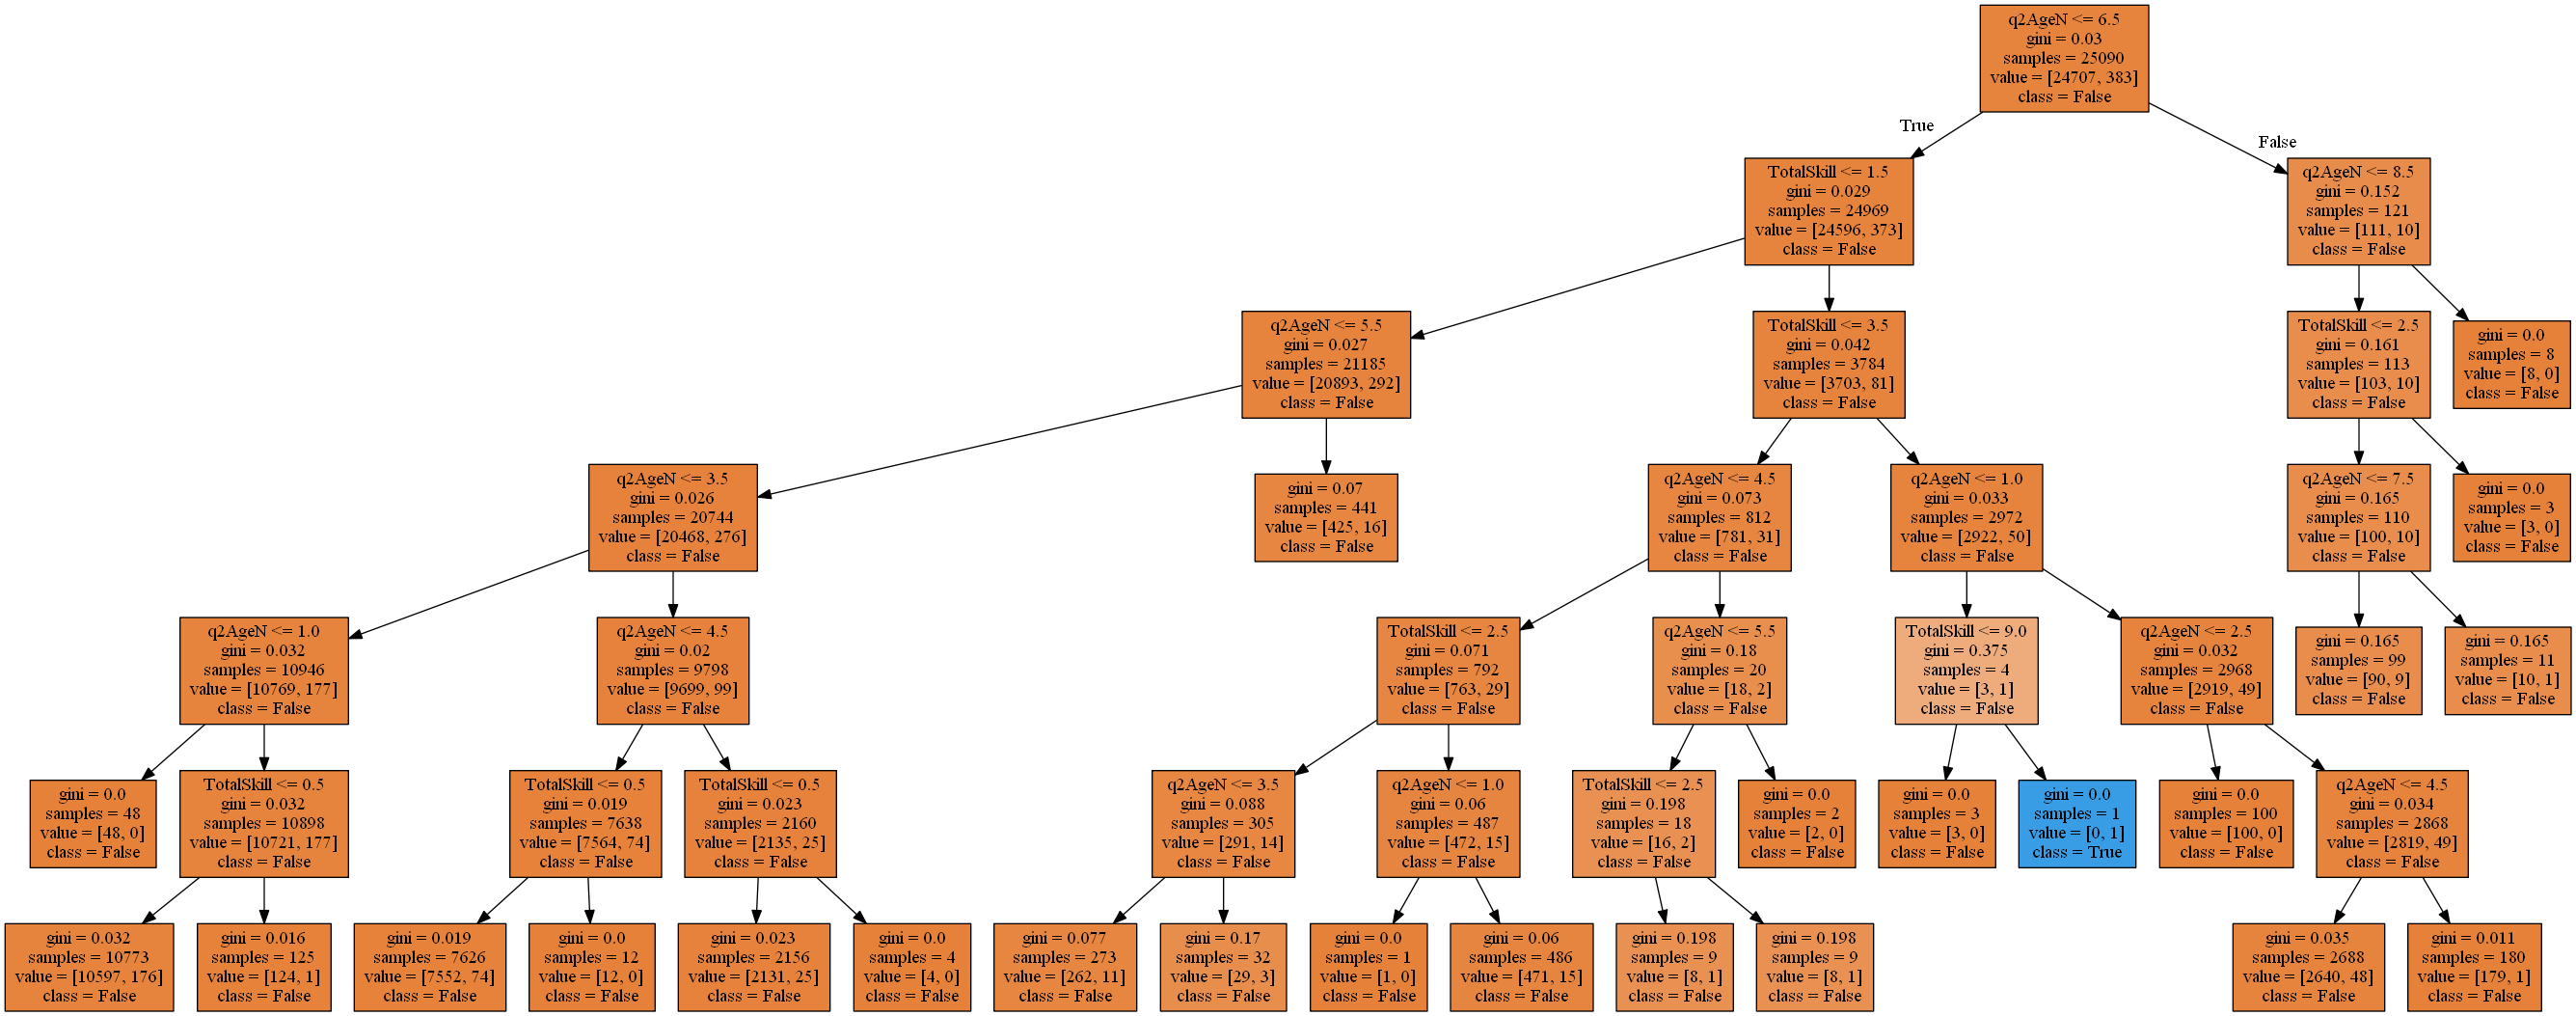

In [294]:
# This code will visualize a decision tree dt, 
# trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
result = np.array([s.decode('UTF-8') for s in dt_target_names])
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=result,filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [301]:
allengpeop = dfCan[(dfCan['q5DegreeFocus'].isin(['Computer Science','Other STEM (science, technology, engineering, math)']))]
enggpm = allengpeop.merge(dfHM,left_on='RespondentID',right_on='RespondentID')

In [302]:
enggpm.groupby(['q8JobLevel']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False]).head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp
q8JobLevel,,,,,,,,,,,,,,
Student,7762.0,6731.0,6700.0,5301.0,494.0,4206.0,1619.0,0,0,0,0,0,0,0
Senior developer,3367.0,2968.0,3953.0,2505.0,783.0,3801.0,1972.0,532,634,1553,950,233,1604,618
Level 1 developer (junior),2950.0,2567.0,3196.0,2208.0,441.0,2675.0,1282.0,369,383,714,538,105,654,226
New grad,689.0,616.0,697.0,550.0,70.0,486.0,218.0,64,71,136,93,16,69,28
Principal engineer,435.0,399.0,465.0,358.0,104.0,397.0,254.0,94,128,236,152,35,188,105


In [308]:
enggpm.groupby(['CountryNumeric2']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False]).head(10)
    
top10Coun = enggpm.groupby(['CountryNumeric2']).agg({'q25LangC':'sum','q25LangCPlusPlus':'sum','q25LangJava':'sum',\
                    'q25LangPython':'sum','q25LangRuby':'sum','q25LangJavascript':'sum','q25LangCSharp':'sum'\
                    ,'q22LangProfC':'sum','q22LangProfCPlusPlus':'sum','q22LangProfJava':'sum','q22LangProfPython':'sum',\
                     'q22LangProfRuby':'sum', 'q22LangProfJavascript':'sum','q22LangProfCSharp':'sum'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False]).head(10)

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp
CountryNumeric2,,,,,,,,,,,,,,
India,6886.0,5686.0,5521.0,3485.0,328.0,3748.0,1178.0,514,467,1017,618,75,748,225
United States,2661.0,2541.0,3406.0,2914.0,670.0,2813.0,1348.0,198,282,627,482,121,634,258
Canada,445.0,386.0,442.0,349.0,65.0,349.0,184.0,30,32,61,39,14,69,22
Brazil,300.0,215.0,379.0,253.0,105.0,352.0,175.0,21,20,98,66,30,125,39
Indonesia,263.0,262.0,261.0,169.0,50.0,209.0,126.0,28,24,82,52,25,60,24
United Kingdom,207.0,183.0,281.0,240.0,48.0,254.0,130.0,20,34,64,50,13,66,45
Russian Federation,186.0,185.0,189.0,183.0,36.0,171.0,111.0,18,40,65,48,12,67,41
Turkey,165.0,139.0,177.0,112.0,14.0,149.0,112.0,13,20,48,19,6,39,33
Bangladesh,146.0,113.0,105.0,51.0,3.0,62.0,37.0,14,22,28,16,1,26,14


In [313]:
skillratio = enggpm[enggpm['CountryNumeric2'].isin(topCoun.index)].groupby(['CountryNumeric2']).agg({'q25LangC':'mean','q25LangCPlusPlus':'mean','q25LangJava':'mean',\
                    'q25LangPython':'mean','q25LangRuby':'mean','q25LangJavascript':'mean','q25LangCSharp':'mean'\
                    ,'q22LangProfC':'mean','q22LangProfCPlusPlus':'mean','q22LangProfJava':'mean','q22LangProfPython':'mean',\
                     'q22LangProfRuby':'mean', 'q22LangProfJavascript':'mean','q22LangProfCSharp':'mean'}).\
                    sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False])

In [372]:
enggpm[(enggpm['CountryNumeric2'].isin(topCoun.index)) & (enggpm['q3Gender'].isin(['Male','Female']))].groupby(['CountryNumeric2','q3Gender']).agg({'q25LangC':'mean','q25LangCPlusPlus':'mean','q25LangJava':'mean',\
                    'q25LangPython':'mean','q25LangRuby':'mean','q25LangJavascript':'mean','q25LangCSharp':'mean'\
                    ,'q22LangProfC':'mean','q22LangProfCPlusPlus':'mean','q22LangProfJava':'mean','q22LangProfPython':'mean',\
                     'q22LangProfRuby':'mean', 'q22LangProfJavascript':'mean','q22LangProfCSharp':'mean'})#\
                    #sort_values(by=['q25LangC','q25LangCPlusPlus','q25LangJava','q25LangPython',\
                     #'q25LangRuby','q25LangJavascript','q25LangCSharp'],ascending=[False,False,False,False,False,False,False])

q25LangC  q25LangCPlusPlus  q25LangJava  \
CountryNumeric2    q3Gender                                            
Brazil             Female    0.843750          0.625000     0.833333   
                   Male      0.897690          0.722022     0.932065   
Canada             Female    0.920455          0.811111     0.784946   
                   Male      0.864286          0.766585     0.824719   
Germany            Female    0.750000          0.625000     0.869565   
                   Male      0.867550          0.782051     0.885870   
India              Female    0.974570          0.847403     0.774049   
                   Male      0.966783          0.861645     0.773752   
Indonesia          Female    0.896552          0.824561     0.721311   
                   Male      0.836000          0.822394     0.757895   
Poland             Female    0.857143          0.666667     0.619048   
                   Male      0.932836          0.885350     0.861446   
Russian Federation Female    0.812500          0.722222     0.777778   
                   Male      0.882051          0.814286     0.797235   
Turkey             Female    0.928571          0.814815     0.928571   
                   Male      0.901961          0.822695     0.833333   
United Kingdom     Female    0.756757          0.658537     0.921569   
                   Male      0.806306          0.715596     0.872659   
United States      Female    0.803101          0.719937     0.875000   
                   Male      0.849540          0.778864     0.887866   

                             q25LangPython  q25LangRuby  q25LangJavascript  \
CountryNumeric2    q3Gender                                                  
Brazil             Female         0.540541     0.312500           0.750000   
                   Male           0.639118     0.495050           0.820972   
Canada             Female         0.567010     0.120000           0.609195   
                   Male           0.660633     0.269767           0.684455   
Germany            Female         0.772727     0.750000           0.666667   
                   Male           0.732558     0.305085           0.781250   
India              Female         0.428458     0.071736           0.559307   
                   Male           0.498807     0.102101           0.592393   
Indonesia          Female         0.288136     0.108696           0.551724   
                   Male           0.547445     0.230366           0.665399   
Poland             Female         0.500000     0.111111           0.500000   
                   Male           0.680000     0.352941           0.661765   
Russian Federation Female         0.600000     0.166667           0.315789   
                   Male           0.682927     0.443038           0.759259   
Turkey             Female         0.625000     0.000000           0.777778   
                   Male           0.533333     0.233333           0.739884   
United Kingdom     Female         0.615385     0.409091           0.692308   
                   Male           0.750000     0.390000           0.806691   
United States      Female         0.679245     0.254005           0.677943   
                   Male           0.747137     0.375940           0.772973   

                             q25LangCSharp  q22LangProfC  \
CountryNumeric2    q3Gender                                
Brazil             Female         0.576923      0.044444   
                   Male           0.682403      0.040909   
Canada             Female         0.431034      0.028037   
                   Male           0.552817      0.053892   
Germany            Female         0.600000      0.000000   
                   Male           0.694737      0.074074   
India              Female         0.260985      0.053547   
                   Male           0.340329      0.066646   
Indonesia          Female         0.360000      0.046154   
                   Male           0.540816      0.080386   
Poland 

In [314]:
skillratio.columns.tolist()

['q25LangC',
 'q25LangCPlusPlus',
 'q25LangJava',
 'q25LangPython',
 'q25LangRuby',
 'q25LangJavascript',
 'q25LangCSharp',
 'q22LangProfC',
 'q22LangProfCPlusPlus',
 'q22LangProfJava',
 'q22LangProfPython',
 'q22LangProfRuby',
 'q22LangProfJavascript',
 'q22LangProfCSharp']

In [320]:
skillgap = skillratio[['q25LangC','q22LangProfC','q25LangCPlusPlus','q22LangProfCPlusPlus','q25LangJava','q22LangProfJava',\
                  'q25LangPython','q22LangProfPython','q25LangRuby','q22LangProfRuby','q25LangJavascript','q22LangProfJavascript'\
                  ,'q25LangCSharp','q22LangProfCSharp']]

In [321]:
skillgap.fillna(0,inplace=True)

In [322]:
skillgap.head()

,q25LangC,q22LangProfC,q25LangCPlusPlus,q22LangProfCPlusPlus,q25LangJava,q22LangProfJava,q25LangPython,q22LangProfPython,q25LangRuby,q22LangProfRuby,q25LangJavascript,q22LangProfJavascript,q25LangCSharp,q22LangProfCSharp
CountryNumeric2,,,,,,,,,,,,,,
India,0.968223,0.064532,0.858653,0.058632,0.774008,0.127684,0.486596,0.077589,0.095822,0.009416,0.587093,0.093911,0.324697,0.028249
Poland,0.925676,0.047826,0.866279,0.086957,0.834225,0.173913,0.656977,0.126087,0.302326,0.013043,0.642857,0.165217,0.631068,0.065217
Turkey,0.906593,0.053719,0.822485,0.082645,0.846890,0.198347,0.546341,0.078512,0.186667,0.024793,0.741294,0.161157,0.704403,0.136364
Brazil,0.892857,0.043210,0.711921,0.041152,0.922141,0.201646,0.630923,0.135802,0.479452,0.061728,0.814815,0.257202,0.673077,0.080247
Russian Federation,0.877358,0.050992,0.800866,0.113314,0.797468,0.184136,0.680297,0.135977,0.423529,0.033994,0.718487,0.189802,0.707006,0.116147


In [340]:

for x in range(0,len(skillgap.columns),2):
    skillgap[x] = skillgap[skillgap.columns[x+1]] - skillgap[skillgap.columns[x]]

In [351]:
skillgap.head(10)

,q25LangC,q22LangProfC,q25LangCPlusPlus,q22LangProfCPlusPlus,q25LangJava,q22LangProfJava,q25LangPython,q22LangProfPython,q25LangRuby,q22LangProfRuby,q25LangJavascript,q22LangProfJavascript,q25LangCSharp,q22LangProfCSharp,0,2,4,6,8,10,12
CountryNumeric2,,,,,,,,,,,,,,,,,,,,,
India,0.968223,0.064532,0.858653,0.058632,0.774008,0.127684,0.486596,0.077589,0.095822,0.009416,0.587093,0.093911,0.324697,0.028249,-0.903690,-0.800021,-0.646325,-0.409006,-0.086406,-0.493182,-0.296448
Poland,0.925676,0.047826,0.866279,0.086957,0.834225,0.173913,0.656977,0.126087,0.302326,0.013043,0.642857,0.165217,0.631068,0.065217,-0.877850,-0.779323,-0.660312,-0.530890,-0.289282,-0.477640,-0.565851
Turkey,0.906593,0.053719,0.822485,0.082645,0.846890,0.198347,0.546341,0.078512,0.186667,0.024793,0.741294,0.161157,0.704403,0.136364,-0.852874,-0.739841,-0.648543,-0.467829,-0.161873,-0.580137,-0.568039
Brazil,0.892857,0.043210,0.711921,0.041152,0.922141,0.201646,0.630923,0.135802,0.479452,0.061728,0.814815,0.257202,0.673077,0.080247,-0.849647,-0.670768,-0.720495,-0.495120,-0.417724,-0.557613,-0.592830
Russian Federation,0.877358,0.050992,0.800866,0.113314,0.797468,0.184136,0.680297,0.135977,0.423529,0.033994,0.718487,0.189802,0.707006,0.116147,-0.826367,-0.687551,-0.613332,-0.544320,-0.389535,-0.528686,-0.590859
Canada,0.874263,0.049180,0.773547,0.052459,0.818519,0.100000,0.645102,0.063934,0.243446,0.022951,0.671154,0.113115,0.534884,0.036066,-0.825083,-0.721088,-0.718519,-0.581167,-0.220495,-0.558039,-0.498818
Germany,0.857988,0.065306,0.768786,0.065306,0.885167,0.175510,0.734694,0.114286,0.352941,0.028571,0.766667,0.151020,0.688679,0.057143,-0.792682,-0.703480,-0.709657,-0.620408,-0.324370,-0.615646,-0.631536
Indonesia,0.848387,0.074074,0.823899,0.063492,0.752161,0.216931,0.504478,0.137566,0.209205,0.066138,0.647059,0.158730,0.508065,0.063492,-0.774313,-0.760407,-0.535230,-0.366911,-0.143067,-0.488329,-0.444572
United States,0.839697,0.044187,0.766285,0.062932,0.884905,0.139924,0.733266,0.107565,0.348777,0.027003,0.754155,0.141486,0.586852,0.057576,-0.795510,-0.703352,-0.744981,-0.625701,-0.321774,-0.612669,-0.529276


In [350]:
EngManagers[EngManagers['CountryNumeric2'].isin(topCoun.index)].groupby('CountryNumeric2').agg({'q17HirChaNotEnoughTalent':'mean'})

,q17HirChaNotEnoughTalent
CountryNumeric2,
Brazil,0.414747
Canada,0.470149
Germany,0.545455
India,0.365340
Indonesia,0.406015
Poland,0.487500
Russian Federation,0.403409
Turkey,0.488095
United Kingdom,0.482353


In [353]:
EngManagers[EngManagers['CountryNumeric2'].isin(topCoun.index)].groupby('CountryNumeric2')\
.agg({'q19TalToolOtherProbSolv':'mean','q19TalToolPersTest':'mean','q19TalToolRemoteorLiveIntTool':'mean','q19TalToolHackerRank':'mean'})

,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolHackerRank
CountryNumeric2,,,,
Brazil,0.562212,0.262673,0.382488,0.211982
Canada,0.477612,0.223881,0.246269,0.141791
Germany,0.568182,0.193182,0.306818,0.056818
India,0.611241,0.258782,0.227752,0.310304
Indonesia,0.593985,0.518797,0.180451,0.300752
Poland,0.612500,0.237500,0.262500,0.100000
Russian Federation,0.539773,0.238636,0.352273,0.079545
Turkey,0.678571,0.440476,0.250000,0.119048
United Kingdom,0.547059,0.152941,0.217647,0.176471


In [356]:
EngManagers.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q5DegreeFocus,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR
0,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Test Automation Lead,NaN,Software Test Engineer,Financial Services,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,Interesting problems to solve,NaN,NaN,Professional growth and learning,NaN,NaN,NaN,NaN,NaN,Technical Phone Interview,Take Home Project,Resume,NaN,NaN,NaN,Good,Yes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning / Deep Learning,1,1,1,0,0,1,0,1.0,0.0,NaN,NaN,0,0,1,1,0,0,0 - 10,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,6458326054,10/17/17 3:18,10/17/17 3:33,United States,16 - 20 years old,45 - 54 years old,Male,"Post graduate degree (Masters, PhD)",Computer Science,NaN,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Director / VP of Engineering,NaN,Unemployed,Financial Services,NaN,Company mission,NaN,NaN,Compensation,Proximity to where you live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HackerRank Challenge,NaN,Technical Phone Interview,NaN,Resume,NaN,NaN,NaN,Acceptable,Yes,1.0,1.0,0.0,0.0,NaN,1.0,0.0,NaN,1.0,NaN,NaN,0.0,Quantum Computing,1,0,0,0,0,1,0,1.0,1.0,1.0,2 to 4 hours,1,1,0,0,0,0,0 - 10,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6458360594,10/17/17 3:35,10/17/17 3:59,Lithuania,16 - 20 years old,25 - 34 years old,Male,College graduate,Computer Science,School or university,"Self-taught (i.e. books, onli

In [519]:
EngManagers[EngManagers['CountryNumeric2'].isin(topCoun.index)].groupby('CountryNumeric2')\
.agg({'q20CandYearExp':'mean',
 'q20CandCompScienceDegree':'mean',
 'q20CandCodingBootcamp':'mean',
 'q20CandSkillCert':'mean',
 'q20CandHackerRankActivity':'mean',
 'q20CandGithubPersProj2':'mean',
 'q20CandOpenSourceContrib':'mean',
 'q20CandHackathonPart':'mean',
 'q20CandPrevWorkExp':'mean',
 'q20CandPrestigeDegree':'mean'})

,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandGithubPersProj2,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree
CountryNumeric2,,,,,,,,,,
Brazil,0.599078,0.336406,0.027650,0.147465,0.041475,0.645161,0.327189,0.064516,0.797235,0.046083
Canada,0.641791,0.492537,0.022388,0.156716,0.052239,0.552239,0.238806,0.067164,0.798507,0.074627
Germany,0.522727,0.409091,0.000000,0.170455,0.045455,0.647727,0.272727,0.056818,0.863636,0.034091
India,0.577283,0.390515,0.133489,0.293911,0.233021,0.495316,0.316159,0.192623,0.650468,0.080796
Indonesia,0.661654,0.360902,0.097744,0.330827,0.180451,0.578947,0.278195,0.127820,0.646617,0.060150
Poland,0.625000,0.250000,0.025000,0.100000,0.037500,0.662500,0.262500,0.075000,0.812500,0.050000
Russian Federation,0.545455,0.244318,0.028409,0.102273,0.056818,0.698864,0.335227,0.022727,0.875000,0.022727
Turkey,0.476190,0.452381,0.023810,0.166667,0.095238,0.607143,0.273810,0.095238,0.761905,0.119048
United Kingdom,0.617647,0.423529,0.005882,0.111765,0.041176,0.523529,0.194118,0.035294,0.894118,0.117647


In [364]:
EngManagers.columns.tolist()

['RespondentID',
 'StartDate',
 'EndDate',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q5DegreeFocus',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q7Level1',
 'q8JobLevel',
 'q8Student',
 'q9CurrentRole',
 'q10Industry',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasHackerRank',
 'q13EmpMeasOtherCodingChallenge',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMeasPastWork',
 'q13EmpMeasOther',
 'q0013_other',
 'q14GoodReflecAbilities',
 'q16

In [368]:
EngManagers[(EngManagers['CountryNumeric2'].isin(topCoun.index))&(EngManagers['q3Gender'].isin(['Male','Female']))]\
.groupby(['CountryNumeric2','q3Gender'])\
.agg({ 'q30LearnCodeStackOverflow':'mean',
 'q30LearnCodeYoutube':'mean',
 'q30LearnCodeMOOC':'mean',
 'q30LearnCodeCompCodingSites':'mean',
 'q30LearnCodeOnlineTutorial':'mean',
 'q30LearnCodeBooks':'mean',
 'q30LearnCodeAcademicPaper':'mean'})

q30LearnCodeStackOverflow  q30LearnCodeYoutube  \
CountryNumeric2    q3Gender                                                   
Brazil             Female                     0.944444             0.555556   
                   Male                       0.893939             0.606061   
Canada             Female                     0.625000             0.625000   
                   Male                       0.829060             0.581197   
Germany            Female                     0.800000             0.600000   
                   Male                       0.915663             0.578313   
India              Female                     0.704082             0.714286   
                   Male                       0.863515             0.705726   
Indonesia          Female                     0.866667             0.600000   
                   Male                       0.898305             0.788136   
Poland             Female                     0.500000             0.666667   
                   Male                       0.891892             0.675676   
Russian Federation Female                     0.909091             0.545455   
                   Male                       0.890244             0.500000   
Turkey             Female                     1.000000             0.875000   
                   Male                       0.973333             0.600000   
United Kingdom     Female                     1.000000             0.647059   
                   Male                       0.908497             0.607843   
United States      Female                     0.851064             0.542553   
                   Male                       0.883573             0.582935   

                             q30LearnCodeMOOC  q30LearnCodeCompCodingSites  \
CountryNumeric2    q3Gender                                                  
Brazil             Female            0.722222                     0.500000   
                   Male              0.595960                     0.257576   
Canada             Female            0.562500                     0.312500   
                   Male              0.487179                     0.273504   
Germany            Female            0.400000                     0.000000   
                   Male              0.554217                     0.289157   
India              Female            0.362245                     0.459184   
                   Male              0.518642                     0.504660   
Indonesia          Female            0.200000                     0.200000   
                   Male              0.500000                     0.406780   
Poland             Female            0.833333                     0.333333   
                   Male              0.459459                     0.364865   
Russian Federation Female            0.545455                     0.181818   
                   Male              0.628049                     0.359756   
Turkey             Female            0.625000                     0.500000   
                   Male              0.680000                     0.293333   
United Kingdom     Female            0.352941                     0.176471   
                   Male              0.418301                     0.274510   
United States      Female            0.515957                     0.313830   
                   Male              0.474482                     0.334131   

                             q30LearnCodeOnlineTutorial  q30LearnCodeBooks  \
CountryNumeric2    q3Gender                                                  
Brazil             Female                      0.444444           0.611111   
                   Male                        0.560606           0.747475   
Canada             Female                      0.250000           0.437500   
                   Male                        0.478632           0.615385   
Germany            Female                      0.200000           1.000000   
                   Male    

In [378]:
dfCan1[(dfCan1['q2Age'].isin(['35 - 44 years old']))&\
       (dfCan['q8JobLevel'] == 'Level 1 developer (junior)')].groupby('q3Gender').size()

q3Gender
Female     30
Male      122
dtype: int64

In [379]:
dfCan1.groupby('q3Gender').size()

q3Gender
Female         4122
Male          20774
Non-Binary      125
dtype: int64

In [399]:
womenpower = (dfCan1[dfCan1.q3Gender!='Non-Binary'].groupby(['q1AgeBeginCoding','q3Gender']).size()/dfCan1.groupby('q3Gender').size()).reset_index()

In [400]:
womenpower[0] = womenpower[0]*100

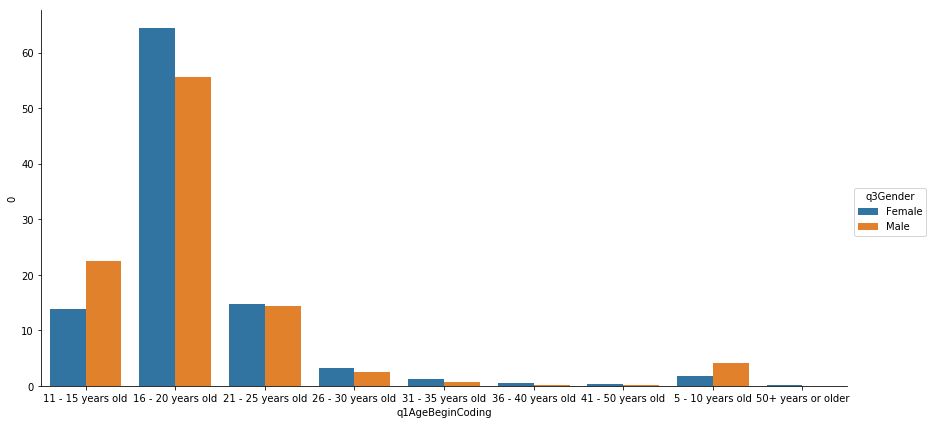

In [739]:
sns.factorplot(x='q1AgeBeginCoding',y=0,hue='q3Gender',kind="bar",data=womenpower,size=6,aspect=2)

In [415]:
for r in df.columns:
    if r.startswith('q13'):
        df.fillna(0,inplace=True)
        df[r] = df[r].apply(lambda x: 0 if x==0 else 1)

In [410]:
topJobLevels = EngManagers.groupby('q8JobLevel').size().nlargest(10)
topJobLevels

q8JobLevel
Senior developer                3427
Level 1 developer (junior)      1355
Principal engineer               509
Architect                        399
Engineering manager              352
Freelancer                       295
Founder / CEO / CTO              277
New grad                         187
Director / VP of Engineering     123
Teacher                            8
dtype: int64

In [421]:
#Interview given types and their satisfaction level at different job levels
df[(df['q8JobLevel'].isin(topJobLevels.index))&(df['q3Gender'].isin(['Female','Male']))]\
.groupby(['q8JobLevel','q3Gender']).agg({ 'q13EmpMeasWhiteboard':'mean',
 'q13EmpMeasHackerRank':'mean',
 'q13EmpMeasTechPhoneInt':'mean',
 'q13EmpMeasResume':'mean',
 'q13EmpMeasPastWork':'mean',
 'q14GoodReflecAbilities':'mean'})

q13EmpMeasWhiteboard  \
q8JobLevel                   q3Gender                         
Architect                    Female                0.272727   
                             Male                  0.503055   
Director / VP of Engineering Female                0.125000   
                             Male                  0.406250   
Engineering manager          Female                0.377778   
                             Male                  0.490814   
Founder / CEO / CTO          Female                0.240000   
                             Male                  0.356902   
Freelancer                   Female                0.242424   
                             Male                  0.243848   
Level 1 developer (junior)   Female                0.436108   
                             Male                  0.422613   
New grad                     Female                0.408163   
                             Male                  0.453390   
Principal engineer           Female                0.511628   
                             Male                  0.529695   
Senior developer             Female                0.521818   
                             Male                  0.521832   

                                       q13EmpMeasHackerRank  \
q8JobLevel                   q3Gender                         
Architect                    Female                0.227273   
                             Male                  0.230143   
Director / VP of Engineering Female                0.125000   
                             Male                  0.125000   
Engineering manager          Female                0.088889   
                             Male                  0.217848   
Founder / CEO / CTO          Female                0.240000   
                             Male                  0.195286   
Freelancer                   Female                0.060606   
                             Male                  0.172260   
Level 1 developer (junior)   Female                0.271981   
                             Male                  0.244786   
New grad                     Female                0.346939   
                             Male                  0.413842   
Principal engineer           Female                0.255814   
                             Male                  0.218299   
Senior developer             Female                0.254545   
                             Male                  0.272798   

                                       q13EmpMeasTechPhoneInt  \
q8JobLevel                   q3Gender                           
Architect                    Female                  0.636364   
                             Male                    0.596741   
Director / VP of Engineering Female                  0.125000   
                             Male                    0.523438   
Engineering manager          Female                  0.377778   
                             Male                    0.553806   
Founder / CEO / CTO          Female                  0.240000   
                             Male                    0.444444   
Freelancer                   Female                  0.454545   
                             Male                    0.348993   
Level 1 developer (junior)   Female                  0.449004   
                             Male                    0.433589   
New grad                     Female                  0.413265   
                             Male                    0.474576   
Principal engineer           Female                  0.581395   
                             Male                    0.619583   
Senior developer             Female                  0.581818   
                             Male                    0.612056   

                                       q13EmpMeasResume  q13EmpMeasPastWork  \
q8JobLevel                   q3Gender                                         
Architect                    Female            0.863636   

In [418]:
df.replace(to_replace='#NULL!',value=np.nan,inplace=True)
df.q14GoodReflecAbilities.unique()

array(['Acceptable', 'Good', 'Poor', 'Very Poor', nan, 'Very Good'], dtype=object)

In [419]:
df['q14GoodReflecAbilities'] = df['q14GoodReflecAbilities'].apply(lambda x:5 if x=='Very Good' \
                        else 4 if x=='Good' else 3 if x=='Acceptable' else 2 if x=='Poor' else 1 if x=='Very Poor' else 0)

In [420]:
df.q14GoodReflecAbilities.unique()

array([3, 4, 2, 1, 0, 5], dtype=int64)

In [425]:
#Interview given types and their satisfaction level at different job levels
df[(df['CountryNumeric2'].isin(topCoun.index))&(df['q3Gender'].isin(['Female','Male']))]\
.groupby(['CountryNumeric2']).agg({ 'q13EmpMeasWhiteboard':'mean',
 'q13EmpMeasHackerRank':'mean',
 'q13EmpMeasTechPhoneInt':'mean',
 'q13EmpMeasResume':'mean',
 'q13EmpMeasPastWork':'mean',
 'q14GoodReflecAbilities':'mean'})

,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasTechPhoneInt,q13EmpMeasResume,q13EmpMeasPastWork,q14GoodReflecAbilities
CountryNumeric2,,,,,,
Brazil,0.287425,0.299401,0.389222,0.650699,0.391218,3.339321
Canada,0.428795,0.214397,0.410016,0.654147,0.428795,3.358372
Germany,0.316406,0.109375,0.382812,0.601562,0.511719,3.355469
India,0.276012,0.288304,0.304817,0.550286,0.312143,3.618947
Indonesia,0.281250,0.260417,0.197917,0.518229,0.294271,3.533854
Poland,0.532258,0.129032,0.447581,0.592742,0.475806,3.318548
Russian Federation,0.475936,0.117647,0.473262,0.679144,0.486631,3.419786
Turkey,0.322581,0.229839,0.403226,0.616935,0.451613,3.241935
United Kingdom,0.364465,0.246014,0.512528,0.642369,0.423690,3.514806


In [427]:
#Interview given types and their satisfaction level in different industries
df[(df['q10Industry'].isin(topInd.index))&(df['q3Gender'].isin(['Female','Male']))]\
.groupby(['q10Industry','q3Gender']).agg({ 'q13EmpMeasWhiteboard':'mean',
 'q13EmpMeasHackerRank':'mean',
 'q13EmpMeasTechPhoneInt':'mean',
 'q13EmpMeasResume':'mean',
 'q13EmpMeasPastWork':'mean',
 'q14GoodReflecAbilities':'mean'})

q13EmpMeasWhiteboard  \
q10Industry                 q3Gender                         
Automotive & Transportation Female                0.430380   
                            Male                  0.445652   
Computer Hardware           Female                0.322581   
                            Male                  0.410853   
Education                   Female                0.192012   
                            Male                  0.222549   
Financial Services          Female                0.429787   
                            Male                  0.476800   
Government                  Female                0.301587   
                            Male                  0.295673   
Health Care                 Female                0.426966   
                            Male                  0.417219   
Media                       Female                0.441441   
                            Male                  0.442737   
Retail                      Female                0.516129   
                            Male                  0.474968   
Security                    Female                0.322581   
                            Male                  0.376190   
Technology                  Female                0.378220   
                            Male                  0.408373   

                                      q13EmpMeasHackerRank  \
q10Industry                 q3Gender                         
Automotive & Transportation Female                0.215190   
                            Male                  0.211957   
Computer Hardware           Female                0.193548   
                            Male                  0.255814   
Education                   Female                0.227343   
                            Male                  0.229893   
Financial Services          Female                0.302128   
                            Male                  0.285333   
Government                  Female                0.206349   
                            Male                  0.173077   
Health Care                 Female                0.157303   
                            Male                  0.230132   
Media                       Female                0.234234   
                            Male                  0.213687   
Retail                      Female                0.258065   
                            Male                  0.246470   
Security                    Female                0.193548   
                            Male                  0.250000   
Technology                  Female                0.316159   
                            Male                  0.281699   

                                      q13EmpMeasTechPhoneInt  \
q10Industry                 q3Gender                           
Automotive & Transportation Female                  0.493671   
                            Male                    0.507246   
Computer Hardware           Female                  0.322581   
                            Male                    0.412791   
Education                   Female                  0.211982   
                            Male                    0.204187   
Financial Services          Female                  0.548936   
                            Male                    0.550933   
Government                  Female                  0.365079   
                            Male                    0.334135   
Health Care                 Female                  0.494382   
                            Male                    0.508278   
Media                       Female                  0.549550   
                            Male                    0.481844   
Retail                      Female                  0.451613   
                            Male                    0.523748   
Security                    Female                  0.419355   
                            Male                    0.385714   
Technology                  

In [428]:
#Interview given types and their satisfaction level in different industries
df[(df['q10Industry'].isin(topInd.index))&(df['q3Gender'].isin(['Female','Male']))]\
.groupby(['q10Industry']).agg({ 'q13EmpMeasWhiteboard':'mean',
 'q13EmpMeasHackerRank':'mean',
 'q13EmpMeasTechPhoneInt':'mean',
 'q13EmpMeasResume':'mean',
 'q13EmpMeasPastWork':'mean',
 'q14GoodReflecAbilities':'mean'})

,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasTechPhoneInt,q13EmpMeasResume,q13EmpMeasPastWork,q14GoodReflecAbilities
q10Industry,,,,,,
Automotive & Transportation,0.443740,0.212361,0.505547,0.630745,0.465927,3.522979
Computer Hardware,0.397373,0.246305,0.399015,0.543514,0.348112,3.546798
Education,0.216657,0.229401,0.205691,0.520154,0.283640,3.415531
Financial Services,0.471564,0.287204,0.550711,0.670142,0.453555,3.562559
Government,0.296451,0.177453,0.338205,0.657620,0.455115,3.388309
Health Care,0.418470,0.220779,0.506494,0.689755,0.493506,3.480519
Media,0.442563,0.216445,0.490931,0.649335,0.480048,3.457074
Retail,0.479358,0.247706,0.516055,0.652523,0.459862,3.558486
Security,0.369295,0.242739,0.390041,0.595436,0.375519,3.568465


8340.333333333334

In [435]:
df[df['q16HiringManager'] == 'Yes'].groupby(['q2Age','q1AgeBeginCoding']).size()

q2Age               q1AgeBeginCoding  
12 - 18 years old   11 - 15 years old       17
                    16 - 20 years old       23
                    21 - 25 years old        1
                    5 - 10 years old         8
18 - 24 years old   11 - 15 years old      277
                    16 - 20 years old      955
                    21 - 25 years old      170
                    5 - 10 years old        46
25 - 34 years old   11 - 15 years old      939
                    16 - 20 years old     2038
                    21 - 25 years old     1015
                    26 - 30 years old      176
                    31 - 35 years old       18
                    5 - 10 years old       221
35 - 44 years old   11 - 15 years old      448
                    16 - 20 years old      481
                    21 - 25 years old      271
                    26 - 30 years old       69
                    31 - 35 years old       29
                    36 - 40 years old       22
                    4

In [434]:
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,0,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",0,0,0,0,C,Student,0,Students,Student,0,0,student,0,0,0,Good work/life balance,Compensation,0,0,0,0,0,0,0,Professional growth and learning,0,0,1,0,0,0,0,1,0,0,0,3,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,0,statisics - using R,Stack Overflow,YouTube,0,0,0,0,0,Other (please specify),datacamp,Yes,No,0.0,NaN,0
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",0,"Other STEM (science, technology, engineering, ...",0,School or university,"Self-taught (i.e. books, online)",0,0,0,0,C,0,Test Automation Lead,0,Software Test Engineer,0,Financial Services,0,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,0,0,Smart people / team,0,Interesting problems to solve,0,0,Professional growth and learning,NaN,0,0,0,0,1,1,1,0,0,0,4,Yes,0,0,Not enough talent,Not enough diverse candidates,0,0,0,0,0 - 10,Resume screening,Referrals,0,"Other problem solving, logic chal

In [450]:
#df.groupby('q18NumDevelopHireWithinNextYear').size()

EngManagers[EngManagers['CountryNumeric2'].isin(topCoun.index)].groupby('q18NumDevelopHireWithinNextYear')\
.agg({'q19TalToolOtherProbSolv':'mean','q19TalToolPersTest':'mean','q19TalToolRemoteorLiveIntTool':'mean',\
      'q19TalToolHackerRank':'mean'}).sort_values(['q19TalToolOtherProbSolv','q19TalToolPersTest','q19TalToolRemoteorLiveIntTool',\
                                                          'q19TalToolHackerRank'])

,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolHackerRank
q18NumDevelopHireWithinNextYear,,,,
501 - 1000,0.285714,0.357143,0.321429,0.392857
0,0.352941,0.058824,0.176471,0.058824
201 - 500,0.516667,0.216667,0.350000,0.500000
51 - 100,0.540670,0.229665,0.320574,0.373206
0 - 10,0.549740,0.234662,0.248180,0.174003
101 - 200,0.561404,0.271930,0.280702,0.517544
1000+,0.578947,0.157895,0.298246,0.315789
11 - 50,0.583524,0.237986,0.320366,0.300915


In [456]:
dfCan1[(dfCan1['q9CurrentRole'] == 'Unemployed')&(dfCan1['CountryNumeric2'].isin(topCoun.index))&\
       (dfCan1['q3Gender'].isin(['Male','Female']))]\
.groupby(['CountryNumeric2','q3Gender','SkillSet']).size().reset_index()

,CountryNumeric2,q3Gender,SkillSet,0
0,Brazil,Female,0001010,1
1,Brazil,Female,1010110,1
2,Brazil,Female,1011010,1
3,Brazil,Male,0000000,1
4,Brazil,Male,0001010,1
5,Brazil,Male,0100010,1
6,Brazil,Male,1010010,1
7,Canada,Female,1011000,1
8,Canada,Female,1110001,1
9,Canada,Male,0011011,1


In [467]:
dfCan1[dfCan1['SkillSet']=='0000000'].groupby(['q1AgeBeginCoding','q2Age','q3Gender']).size()

q1AgeBeginCoding    q2Age               q3Gender  
11 - 15 years old   12 - 18 years old   Female          5
                                        Male           21
                    18 - 24 years old   Female          1
                                        Male           12
                    25 - 34 years old   Female          2
                                        Male           11
                    35 - 44 years old   Female          1
                                        Male           10
                    45 - 54 years old   Male            1
16 - 20 years old   12 - 18 years old   Female          9
                                        Male           34
                                        Non-Binary      1
                    18 - 24 years old   Female         36
                                        Male          131
                                        Non-Binary      1
                    25 - 34 years old   Female          3
                     

In [464]:
dfCan1.groupby('q1AgeBeginCoding').size()

q1AgeBeginCoding
11 - 15 years old      5264
16 - 20 years old     14293
21 - 25 years old      3626
26 - 30 years old       642
31 - 35 years old       193
36 - 40 years old        67
41 - 50 years old        34
5 - 10 years old        933
50+ years or older        8
dtype: int64

In [472]:
df.columns.tolist()

['RespondentID',
 'StartDate',
 'EndDate',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q0004_other',
 'q5DegreeFocus',
 'q0005_other',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q7Level1',
 'q8JobLevel',
 'q0008_other',
 'q8Student',
 'q9CurrentRole',
 'q0009_other',
 'q10Industry',
 'q0010_other',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasHackerRank',
 'q13EmpMeasOtherCodingChallenge',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMea

In [496]:
dfNum = df[['q3Gender','q9CurrentRole', 
 'q25LangC',
 'q25LangCPlusPlus',
 'q25LangJava',
 'q25LangPython',
 'q25LangRuby',
 'q25LangJavascript',
 'q25LangCSharp',
 'q25Scala',
 'q25LangPerl',
 'q25LangSwift',
 'q25LangPHP',
 'q25LangR']]

In [497]:
dfNum['isMale'] = dfNum['q3Gender'].apply(lambda x: 1 if x=='Male' else 0)
dfNum['isFemale'] = dfNum['q3Gender'].apply(lambda x: 1 if x=='Female' else 0)
dfNum['isEmployed'] = dfNum['q9CurrentRole'].apply(lambda x: 0 if x=='Unemployed' else 1)

In [498]:
dfNum.head()

,q3Gender,q9CurrentRole,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,isMale,isFemale,isEmployed
0,Female,Student,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,0,1,1
1,Male,Software Test Engineer,0,0,Know,0,0,0,0,0,0,0,0,0,1,0,1
2,Female,Student,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,0,1,1
3,Male,Student,0,Know,Will Learn,Will Learn,Know,Will Learn,Know,0,0,0,Know,0,1,0,1
4,Female,Front-end Developer,0,0,0,0,0,Know,0,0,0,0,0,0,0,1,1


In [499]:
for r in dfNum.columns:
    if r.startswith('q25'):
        dfNum[r].fillna(0,inplace=True)
        dfNum[r] = dfNum[r].apply(lambda x: 1 if x=='Know' else 0)

In [500]:
dfNum.head()

,q3Gender,q9CurrentRole,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,isMale,isFemale,isEmployed
0,Female,Student,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
1,Male,Software Test Engineer,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,Female,Student,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,Male,Student,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1
4,Female,Front-end Developer,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [501]:
dfNum.drop({'q3Gender','q9CurrentRole'},axis=1,inplace=True)

In [502]:
dfNum.head()

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,isMale,isFemale,isEmployed
0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [503]:
cor = dfNum.corr()

In [504]:
cor[cor<1]#.stack().nlargest(20)

,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,isMale,isFemale,isEmployed
q25LangC,NaN,0.493785,0.174467,0.097213,-0.023758,-0.015958,0.026414,0.011313,0.078247,0.019900,0.084190,0.048372,-0.007950,0.011320,-0.000896
q25LangCPlusPlus,0.493785,NaN,0.155940,0.095164,-0.019312,0.000098,0.100580,0.017710,0.073562,0.025555,0.092414,0.048010,0.013064,-0.008826,0.009435
q25LangJava,0.174467,0.155940,NaN,0.095194,0.027807,0.171605,0.092628,0.105159,0.055504,0.050573,0.118346,0.047009,-0.003343,0.006266,0.022849
q25LangPython,0.097213,0.095164,0.095194,NaN,0.128552,0.107480,0.013664,0.090535,0.093019,0.065416,0.086506,0.194475,0.047011,-0.050496,0.019290
q25LangRuby,-0.023758,-0.019312,0.027807,0.128552,NaN,0.173897,0.061730,0.095374,0.123132,0.107641,0.087414,0.059905,0.015512,-0.020621,0.008038
q25LangJavascript,-0.015958,0.000098,0.171605,0.107480,0.173897,NaN,0.207963,0.067269,0.075901,0.076928,0.325624,0.045607,0.041390,-0.043245,0.029248
q25LangCSharp,0.026414,0.100580,0.092628,0.013664,0.061730,0.207963,NaN,0.033306,0.066775,0.078993,0.131487,0.015649,0.056090,-0.058310,0.019940
q25Scala,0.011313,0.017710,0.105159,0.090535,0.095374,0.067269,0.033306,NaN,0.088660,0.067170,0.010763,0.086840,0.039146,-0.036423,0.022032
q25LangPerl,0.078247,0.073562,0.055504,0.093019,0.123132,0.075901,0.066775,0.088660,NaN,0.048614,0.111664,0.065064,0.008754,-0.010210,-0.002946
q25LangSwift,0.019900,0.025555,0.050573,0.065416,0.107641,0.076928,0.078993,0.067170,0.048614,NaN,0.070496,0.036131,0.027485,-0.028426,0.014501


In [505]:
df.columns.tolist()

['RespondentID',
 'StartDate',
 'EndDate',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q0004_other',
 'q5DegreeFocus',
 'q0005_other',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q7Level1',
 'q8JobLevel',
 'q0008_other',
 'q8Student',
 'q9CurrentRole',
 'q0009_other',
 'q10Industry',
 'q0010_other',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasHackerRank',
 'q13EmpMeasOtherCodingChallenge',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMea

In [506]:
dfNum = df[['q2Age','q3Gender','q9CurrentRole', 
  'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther']]

In [509]:
for r in dfNum.columns:
    if r.startswith('q12'):
        dfNum[r].fillna(0,inplace=True)
        dfNum[r] = dfNum[r].apply(lambda x: 0 if x==0 else 1)

In [508]:
dfNum['isMale'] = dfNum['q3Gender'].apply(lambda x: 1 if x=='Male' else 0)
dfNum['isFemale'] = dfNum['q3Gender'].apply(lambda x: 1 if x=='Female' else 0)
dfNum['isEmployed'] = dfNum['q9CurrentRole'].apply(lambda x: 0 if x=='Unemployed' else 1)

In [511]:
df_withdum = pd.get_dummies(dfNum,columns=['q2Age'])

In [512]:
df_withdum.head()

,q3Gender,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,isMale,isFemale,isEmployed,q2Age_12 - 18 years old,q2Age_18 - 24 years old,q2Age_25 - 34 years old,q2Age_35 - 44 years old,q2Age_45 - 54 years old,q2Age_55 - 64 years old,q2Age_65 - 74 years old,q2Age_75 years or older,q2Age_Under 12 years old
0,Female,Student,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1,Male,Software Test Engineer,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2,Female,Student,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0
3,Male,Student,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
4,Female,Front-end Developer,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


In [513]:
df_withdum.drop({'q3Gender','q9CurrentRole'},axis=1,inplace=True)

In [514]:
coor = df_withdum.corr()

In [517]:
coor[coor<1].stack().nsmallest(50)[::2]

isMale                   isFemale                     -0.972736
q2Age_18 - 24 years old  q2Age_25 - 34 years old      -0.719201
                         q2Age_35 - 44 years old      -0.321309
q2Age_25 - 34 years old  q2Age_35 - 44 years old      -0.229470
q12JobCritCompensation   q2Age_18 - 24 years old      -0.217102
q2Age_12 - 18 years old  q2Age_18 - 24 years old      -0.205627
                         q2Age_25 - 34 years old      -0.146853
q2Age_18 - 24 years old  q2Age_45 - 54 years old      -0.138352
q12JobCritCompensation   q2Age_12 - 18 years old      -0.103296
q2Age_25 - 34 years old  q2Age_45 - 54 years old      -0.098807
q12JobCritProximity      q2Age_18 - 24 years old      -0.095985
q12JobCritCompensation   q12JobCritProfGrowth         -0.082939
q12JobCritProfGrowth     q2Age_35 - 44 years old      -0.080663
isMale                   q2Age_18 - 24 years old      -0.078876
q12JobCritCompensation   isFemale                     -0.077850
q12JobCritPrefTechStack  q2Age_18 - 24 y

In [518]:
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,0,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",0,0,0,0,C,Student,0,Students,Student,0,0,student,0,0,0,Good work/life balance,Compensation,0,0,0,0,0,0,0,Professional growth and learning,0,0,1,0,0,0,0,1,0,0,0,3,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,0,statisics - using R,Stack Overflow,YouTube,0,0,0,0,0,Other (please specify),datacamp,Yes,No,0.0,NaN,0
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",0,"Other STEM (science, technology, engineering, ...",0,School or university,"Self-taught (i.e. books, online)",0,0,0,0,C,0,Test Automation Lead,0,Software Test Engineer,0,Financial Services,0,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,0,0,Smart people / team,0,Interesting problems to solve,0,0,Professional growth and learning,NaN,0,0,0,0,1,1,1,0,0,0,4,Yes,0,0,Not enough talent,Not enough diverse candidates,0,0,0,0,0 - 10,Resume screening,Referrals,0,"Other problem solving, logic chal

In [524]:
for r in df.columns:
    if r.startswith('q20'):
        df[r].fillna(0,inplace=True)
        df[r] = df[r].apply(lambda x: 0 if x==0 else 1)

In [640]:
industrywiseGit = df[(df['CountryNumeric2'].isin(topCoun.index)) & (df['q10Industry'].isin(topInd.index)) ]\
.groupby(['q10Industry'])\
.agg({'q20CandYearExp':'mean',
 'q20CandCompScienceDegree':'mean',
 'q20CandHackerRankActivity':'mean',
 'q20CandGithubPersProj2':'mean',
 'q20CandOpenSourceContrib':'mean',
 'q20CandHackathonPart':'mean',
 'q20CandPrevWorkExp':'mean'}).reset_index().replace(to_replace='Automotive & Transportation',value='Automotive').sort_values(by='q20CandCompScienceDegree')

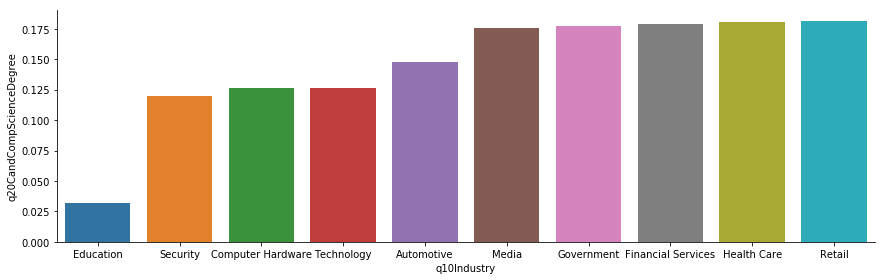

In [641]:
sns.factorplot(x='q10Industry',y='q20CandCompScienceDegree',data=industrywiseGit,kind='bar',aspect=3.1)

In [540]:
df['isTechnology'] = df['q10Industry'].apply(lambda x: 1 if x=='Technology' else 0)

In [553]:
top15Ind = df.groupby('q10Industry').size().nlargest(14)

In [555]:
df[(df['CountryNumeric2'].isin(topCoun.index)) & (df['q10Industry'].isin(top15Ind.index)) ]\
.groupby(['isTechnology'])\
.agg({'q20CandYearExp':'mean',
 'q20CandCompScienceDegree':'mean',
 'q20CandHackerRankActivity':'mean',
 'q20CandGithubPersProj2':'mean',
 'q20CandOpenSourceContrib':'mean',
 'q20CandHackathonPart':'mean',
 'q20CandPrevWorkExp':'mean'})

,q20CandYearExp,q20CandCompScienceDegree,q20CandHackerRankActivity,q20CandGithubPersProj2,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp
isTechnology,,,,,,,
0,0.164049,0.103549,0.030017,0.144735,0.067830,0.024782,0.209540
1,0.179326,0.126292,0.042697,0.169438,0.087191,0.039401,0.223221


In [689]:
for r in df.columns:
    if r.startswith('q25') or r.startswith('q22'):
        df[r].fillna(0,inplace=True)
        df[r] = df[r].apply(lambda x: 0 if x==0 else 1)

In [690]:
df['SkillSetReq'] = df['q22LangProfC'].astype(str) + df['q22LangProfCPlusPlus'].astype(str) + df['q22LangProfJava'].astype(str)\
+df['q22LangProfPython'].astype(str)+df['q22LangProfRuby'].astype(str)+df['q22LangProfJavascript'].astype(str)\
+df['q22LangProfCSharp'].astype(str)+df['q22LangProfR'].astype(str)+df['q22LangProfPHP'].astype(str)

In [691]:
df['SkillSet'] = df['q25LangC'].astype(str) + df['q25LangCPlusPlus'].astype(str) + df['q25LangJava'].astype(str)\
+df['q25LangPython'].astype(str)+df['q25LangRuby'].astype(str)+df['q25LangJavascript'].astype(str)\
+df['q25LangCSharp'].astype(str)+df['q25LangR'].astype(str)+df['q25LangPHP'].astype(str)

In [692]:
top10SkillReqd = df[(df['q16HiringManager']=='Yes')&(df['SkillSetReq']!='000000000')].groupby('SkillSetReq').size().sort_values(ascending=False).nlargest(10).reset_index()

In [693]:
top10SkillReqd.SkillSetReq = top10SkillReqd.SkillSetReq.astype(str)


In [694]:
top10SkillReqd.head(10)

,SkillSetReq,0
0,001000000,659
1,001001000,610
2,000001000,447
3,000001100,318
4,000101000,239
5,001100000,226
6,000100000,220
7,001101000,211
8,000001001,192
9,000000100,161


In [607]:
df[(df['SkillSet'].isin(top10SkillReqd.SkillSetReq)) & (df['q9CurrentRole'] == 'Unemployed')]

20

In [609]:
df[df.SkillSetReq.isin(top10SkillReqd.SkillSetReq)].groupby(['SkillSetReq','q18NumDevelopHireWithinNextYear']).size()

SkillSetReq  q18NumDevelopHireWithinNextYear
000000100    0 - 10                             136
             1000+                                1
             101 - 200                            1
             11 - 50                             19
             51 - 100                             4
000001000    0 - 10                             351
             1000+                                2
             101 - 200                            4
             11 - 50                             72
             201 - 500                            2
             501 - 1000                           1
             51 - 100                            13
000001001    0 - 10                             168
             101 - 200                            1
             11 - 50                             22
             51 - 100                             1
000001100    0 - 10                             254
             11 - 50                             53
             201 - 

In [620]:
df[df['q18NumDevelopHireWithinNextYear'].isin(['501 - 1000','1000+','201 - 500','0 - 10'])].\
groupby(['q18NumDevelopHireWithinNextYear']).apply(lambda x:x.groupby(['SkillSetReq']).size().nlargest(3))

q18NumDevelopHireWithinNextYear  SkillSetReq
0 - 10                           000000000      653
                                 001000000      470
                                 001001000      425
1000+                            000000000       28
                                 001000000        7
                                 001101000        3
201 - 500                        000000000       20
                                 001001000        8
                                 000100000        3
501 - 1000                       000000000       10
                                 001001000        4
                                 001100000        4
dtype: int64

In [623]:
df[(df['q16HiringManager']=='Yes')&(df['SkillSetReq']!='000000000')].groupby(['q3Gender']).apply(lambda x: x.groupby('SkillSetReq').size().nlargest(5))

q3Gender    SkillSetReq
Female      001000000       75
            000001000       67
            001001000       55
            000100000       23
            001100000       23
Male        001000000      580
            001001000      553
            000001000      376
            000001100      295
            000101000      212
Non-Binary  000001000        4
            000101000        4
            001000000        4
            000100000        3
            001111111        2
dtype: int64

In [628]:
df[(df['q16HiringManager']=='Yes')&(df['SkillSet'] == df['SkillSetReq'])].groupby('q3Gender').size()

q3Gender
Female         52
Male          441
Non-Binary      3
dtype: int64

In [630]:
len(df[(df['q9CurrentRole']=='Student')&(df['SkillSet'].isin(top10SkillReqd.SkillSetReq))])

143

In [643]:
df[(df['q9CurrentRole']=='Student')&(df['q10Industry'].isin(topInd.index))\
   &(~df['SkillSet'].isin(top10SkillReqd.SkillSetReq))].groupby('SkillSet').size().nlargest(20)

SkillSet
111111111    1390
111111101     296
111101001     295
111101000     277
111100000     225
111101101     216
111111100     150
111101100     148
111111001     119
111101010     110
111101011     108
111101111      97
111111000      96
111111011      94
111111110      80
111101110      61
111100001      58
111100100      57
111000000      50
110100000      49
dtype: int64

In [631]:
df.groupby('q4Education').size()

q4Education
College graduate                          12010
High school graduate                       1289
Post graduate degree (Masters, PhD)        6030
Some college                               2499
Some high school                            316
Some post graduate work (Masters, PhD)     2493
Vocational training (like bootcamp)         148
dtype: int64

In [658]:
df[(df['q5DegreeFocus'].isin(nonEngDegrees.index))]#&(df['SkillSet'].isin(['000001001','000000001','000001000']))].groupby('isTechnology').size()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,isTechnology,SkillSetReq,SkillSet


In [664]:
df.q5DegreeFocus.unique()

array(['Computer Science',
       'Other STEM (science, technology, engineering, math)', nan, '#NULL!'], dtype=object)

In [655]:
nonEngDeg

,q8JobLevel,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp
0,Above junior below senior,NaN,0.0,0.0,0.0,NaN,0.0,NaN
1,Analyst,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Architect,1.0,1.0,3.0,3.0,0.0,5.0,2.0
3,Consultant,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,Data Analyst,NaN,0.0,NaN,1.0,1.0,1.0,NaN
5,Data analyst,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,Developer Support Analyst,NaN,NaN,0.0,NaN,0.0,1.0,NaN
7,Engineering manager,2.0,3.0,4.0,3.0,1.0,5.0,1.0
8,Financial Consultant,NaN,0.0,NaN,0.0,NaN,NaN,0.0
9,Founder / CEO / CTO,0.0,NaN,0.0,0.0,1.0,1.0,NaN


In [650]:
df[(df['q16HiringManager']=='Yes')&(df['SkillSetReq'].isin(top10SkillReqd.SkillSetReq))].groupby(['isTechnology','SkillSetReq']).size().sort_values(ascending=False)

isTechnology  SkillSetReq
0             001000000      397
              001001000      351
1             001000000      262
              001001000      259
0             000001000      259
              000001100      213
1             000001000      188
0             000101000      145
              000100000      122
1             001100000      115
              001101000      112
0             000001001      112
              001100000      111
              000000100      110
1             000001100      105
0             001101000       99
1             000100000       98
              000101000       94
              000001001       80
              000000100       51
dtype: int64

In [666]:
def fn3(x):
    if 'Some college' in x:
        return 3
    elif 'College graduate' in x:
        return 3
    elif 'Post graduate degree (Masters, PhD)' in x:
        return 4
    elif 'Some post graduate work (Masters, PhD)' in x:
        return 4
    elif 'High school graduate' in x:
        return 2
    elif 'Some high school' in x:
        return 2
    elif 'Vocational training (like bootcamp)' in x:
        return 1

In [668]:
df['q4Education'] = df['q4Education'].apply(fn3)

In [670]:
def fnAge(x):
    if 'Under 12 years old' in x:
        return 6
    elif '12 - 18 years old' in x:
        return 15
    elif '18 - 24 years old' in x:
        return 21
    elif '25 - 34 years old' in x:
        return 30
    elif '35 - 44 years old' in x:
        return 40
    elif '45 - 54 years old' in x:
        return 50
    elif '55 - 64 years old' in x:
        return 60
    elif '65 - 74 years old' in x:
        return 70

In [671]:
df['q2Age'] = df['q2Age'].apply(fnAge)

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,21.0,Female,3.0,NaN,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,NaN,student,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional growth and learning,NaN,NaN,Whiteboard Interview,NaN,NaN,NaN,NaN,Resume,NaN,NaN,NaN,Acceptable,No,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,NaN,statisics - using R,Stack Overflow,YouTube,NaN,NaN,NaN,NaN,NaN,Other (please specify),datacamp,Yes,No,NaN,#NULL!,NaN
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,30.0,Male,4.0,NaN,"Other STEM (science, technology, engineering, ...",NaN,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,NaN,Test Automation Lead,NaN,Software Test Engineer,NaN,Financial Services,NaN,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,I

In [679]:
dfNum1 = df[['q1AgeBeginCoding','q2Age','q4Education','q5DegreeFocus','q3Gender','q9CurrentRole','q16HiringManager', 
 'q25LangC',
 'q25LangCPlusPlus',
 'q25LangJava',
 'q25LangPython',
 'q25LangRuby',
 'q25LangJavascript',
 'q25LangCSharp',
 'q25Scala',
 'q25LangPerl',
 'q25LangSwift',
 'q25LangPHP',
 'q25LangR']]

In [680]:
dfNum1['isFemale'] = dfNum1['q3Gender'].apply(lambda x: 1 if x=='Female' else 0)
dfNum1['isEmployed'] = dfNum1['q9CurrentRole'].apply(lambda x: 0 if x=='Unemployed' else 0 if x=='Student' else 1)
dfNum1['q16HiringManager'] = dfNum1['q16HiringManager'].apply(lambda x: 1 if x=='Yes' else 0)
dfNum1['is']

In [681]:
dfNum1.head()

,q1AgeBeginCoding,q2Age,q4Education,q5DegreeFocus,q3Gender,q9CurrentRole,q16HiringManager,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,isFemale,isEmployed
0,16 - 20 years old,21.0,3.0,Computer Science,Female,Student,No,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,1,0
1,16 - 20 years old,30.0,4.0,"Other STEM (science, technology, engineering, ...",Male,Software Test Engineer,Yes,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,11 - 15 years old,15.0,3.0,"Other STEM (science, technology, engineering, ...",Female,Student,No,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,1,0
3,11 - 15 years old,15.0,3.0,Computer Science,Male,Student,No,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN,Know,NaN,0,0
4,16 - 20 years old,30.0,3.0,NaN,Female,Front-end Developer,Yes,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [685]:
df.groupby(['q1AgeBeginCoding','q3Gender']).size()

q1AgeBeginCoding    q3Gender  
#NULL!              #NULL!           14
                    Female            4
                    Male             12
11 - 15 years old   #NULL!            7
                    Female          569
                    Male           4651
                    Non-Binary       37
16 - 20 years old   #NULL!           36
                    Female         2657
                    Male          11543
                    Non-Binary       57
21 - 25 years old   #NULL!            8
                    Female          609
                    Male           2998
                    Non-Binary       11
26 - 30 years old   #NULL!            1
                    Female          130
                    Male            506
                    Non-Binary        5
31 - 35 years old   Female           48
                    Male            144
                    Non-Binary        1
36 - 40 years old   Female           19
                    Male             47
         

In [686]:
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPHP,q22LangProfR,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25Scala,q25LangPerl,q25LangSwift,q25LangPHP,q25LangR,q27EmergingTechSkill,q0027_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,q30LearnCodeAcademicPaper,q30LearnCodeOther,q0030_other,q32RecommendHackerRank,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,21.0,Female,3.0,NaN,Computer Science,"statistics, computer science",School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,Student,NaN,Students,Student,NaN,NaN,student,NaN,NaN,NaN,Good work/life balance,Compensation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional growth and learning,NaN,NaN,Whiteboard Interview,NaN,NaN,NaN,NaN,Resume,NaN,NaN,NaN,Acceptable,No,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know,NaN,statisics - using R,Stack Overflow,YouTube,NaN,NaN,NaN,NaN,NaN,Other (please specify),datacamp,Yes,No,NaN,#NULL!,NaN
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,30.0,Male,4.0,NaN,"Other STEM (science, technology, engineering, ...",NaN,School or university,"Self-taught (i.e. books, online)",NaN,NaN,NaN,NaN,C,NaN,Test Automation Lead,NaN,Software Test Engineer,NaN,Financial Services,NaN,Preferred tech stack,Company mission,Company culture,Good work/life balance,Compensation,NaN,NaN,Smart people / team,NaN,I

In [688]:
df.columns

Index(['RespondentID', 'StartDate', 'EndDate', 'CountryNumeric2',
       'q1AgeBeginCoding', 'q2Age', 'q3Gender', 'q4Education', 'q0004_other',
       'q5DegreeFocus',
       ...
       'q30LearnCodeOnlineTutorial', 'q30LearnCodeBooks',
       'q30LearnCodeAcademicPaper', 'q30LearnCodeOther', 'q0030_other',
       'q32RecommendHackerRank', 'q33HackerRankChallforJob', 'q34PositiveExp',
       'q34IdealLengHackerRankTest', 'q0035_other'],
      dtype='object', length=135)

In [704]:
df[(df['q3Gender'] == 'Female')&(~df['q9CurrentRole'].isin(['Student','Unemployed']))].groupby(['q1AgeBeginCoding','SkillSet']).size().nlargest(15)

q1AgeBeginCoding   SkillSet 
16 - 20 years old  111111111    343
21 - 25 years old  111111111     66
11 - 15 years old  111111111     63
16 - 20 years old  111111101     51
                   111101000     42
                   111111100     42
                   111101001     34
                   111101100     33
                   111101101     31
                   111111000     26
                   111100000     22
                   111111011     20
                   111101111     18
21 - 25 years old  001101000     18
16 - 20 years old  111101010     17
dtype: int64

In [702]:
df[(df['q3Gender'] == 'Male')&(~df['q9CurrentRole'].isin(['Student','Unemployed']))].groupby('SkillSet').size().nlargest(10)/len(df[df['q3Gender']=='Male'])

SkillSet
111111111    0.100992
111101000    0.028064
111111101    0.021565
111101101    0.021469
111101001    0.019736
111101100    0.019736
111111100    0.014778
111100000    0.014682
001101000    0.014489
111111000    0.011023
dtype: float64

In [705]:
df1 = df[df['q10Industry'].isin(topInd.index)]

In [708]:
dfGit = df1[['q10Industry','q3Gender','q20CandGithubPersProj2']]

In [710]:
dfGit['q3Gender']=dfGit['q3Gender'].apply(lambda x: 1 if x=='Male' else 0)
dfGit['q20CandGithubPersProj2'] = dfGit['q20CandGithubPersProj2'].replace(to_replace='#NULL!',value=0).fillna(0)

In [712]:
dfGit['q20CandGithubPersProj2'] = dfGit['q20CandGithubPersProj2'].apply(lambda x: 0 if x==0 else 1)  

In [714]:
def fnInd(x):
    if 'Technology' in x:
        return 1
    elif 'Education' in x:
        return 2
    elif 'Financial' in x:
        return 3
    elif 'Retail' in x:
        return 4
    elif 'Media' in x:
        return 5
    elif 'Health' in x:
        return 6
    elif 'Auto' in x:
        return 7
    elif 'Hardware' in x:
        return 8
    elif 'Security' in x:
        return 9
    else:
        return 10

In [715]:
dfGit['q10Industry'] = dfGit['q10Industry'].apply(fnInd)

In [732]:
corrr = dfGit.corr()

In [733]:
corrr[corrr<1]

,q10Industry,q3Gender,q20CandGithubPersProj2
q10Industry,NaN,0.042054,0.033886
q3Gender,0.042054,NaN,0.081477
q20CandGithubPersProj2,0.033886,0.081477,NaN


In [717]:
X = dfGit.drop('q20CandGithubPersProj2',axis=1)
Y = dfGit.q20CandGithubPersProj2

In [728]:
import sklearn.tree
dt = sklearn.tree.DecisionTreeClassifier(max_depth = 5)

In [729]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualize the tree

In [741]:
nonEnggDegrees = df[~df.q5DegreeFocus.isin(['Computer Science','Other STEM (science, technology, engineering, math)'])]\
.groupby('q5DegreeFocus')['RespondentID'].count().nlargest(15).reset_index()

In [748]:
df[(df['q3Gender'] == 'Female')&(df['q2Age'].isin(['35 - 44 years old']))].groupby('q8JobLevel').size().nlargest(10)

q8JobLevel
Senior developer                87
Level 1 developer (junior)      30
Principal engineer              17
Student                         15
Engineering manager             12
Freelancer                       8
Architect                        6
Founder / CEO / CTO              4
New grad                         4
Director / VP of Engineering     2
dtype: int64

In [750]:
df[(df['q10Industry'] == 'Technology')&(df['q3Gender']!='Non-Binary')].groupby('q3Gender').size()

q3Gender
#NULL!      27
Female    1708
Male      8289
dtype: int64